In [1]:
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tesis_funciones_v4 as mt

In [4]:
def compplot(Datos: pd.DataFrame, Title: str, ticks:int = 60, rotation = 90, Figsize = (25, 6)):

  col_fin_index =  ['cyan', 'blue',  'teal', 'purple', 'royalblue']

  col_cripto = ['red', 'orangered', 'gold',  'crimson', 'darkorange']

  colores = col_fin_index + col_cripto #col_cripto if not fin else col_fin_index

  COLORES = {}
  for serie, color in zip(mt.Precios.index, colores):
    COLORES[serie] = color

  plt.figure(figsize=Figsize)
  plt.title(Title)
  for serie, color in zip(Datos.index, colores):
    plt.plot(Datos.loc[serie], label = serie, color = COLORES[serie])
  plt.xticks(Datos.iloc[0].index[::ticks], rotation=rotation)
  plt.grid()
  plt.legend()
  plt.show()

In [5]:
def corr_compplot(PCC:np.array, DCC:np.array, Title_PCC: str, Title_DCC: str):

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14.3, 5))
  sns.heatmap(PCC, cmap = 'Spectral', annot=True, vmin=-1, vmax=1, ax = axes[0])
  axes[0].set_title(Title_PCC)

  sns.heatmap(DCC, cmap = 'Spectral', annot=True, vmin=-1, vmax=1, ax=axes[1])
  axes[1].set_title(Title_DCC)

  for ax in axes:
    ax.set_xticks(range(10), mt.Precios.index, rotation = 90, ha = "left")
    ax.set_yticks(range(10), mt.Precios.index, rotation = 0, va = "top")
  plt.show()

In [6]:
def scatter_corr_compplot(PCC: np.array, DCC: np.array, Title: str, series:list):

  fig, axes = plt.subplots(5, 2, figsize=(12, 25))  # Crear 10 filas, 2 columnas

  for j in range(10):
      indices = list(range(10))
      indices.remove(j)  # Removemos el índice j para no compararlo consigo mismo

      row, col = divmod(j, 2)  # Determina en qué subfigura colocar la gráfica
      ax = axes[row, col]  # Seleccionamos el subplot correspondiente

      for i in indices:
          ax.plot(PCC[j][i], DCC[j][i], 'o', color = colores[i], label=series[i])

      ax.set_xlabel("PCC")
      ax.set_ylabel("DCC")
      ax.set_title(series[j])
      ax.legend()
      ax.grid()
  fig.suptitle(Title)
  plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
  plt.show()

In [7]:
def meanCC(Corr_matrix: np.array) -> float:
    N = Corr_matrix.shape[0]
    i, j = np.tril_indices(N, k=-1)
    return Corr_matrix[i, j].mean()

# Graficamos los datos:

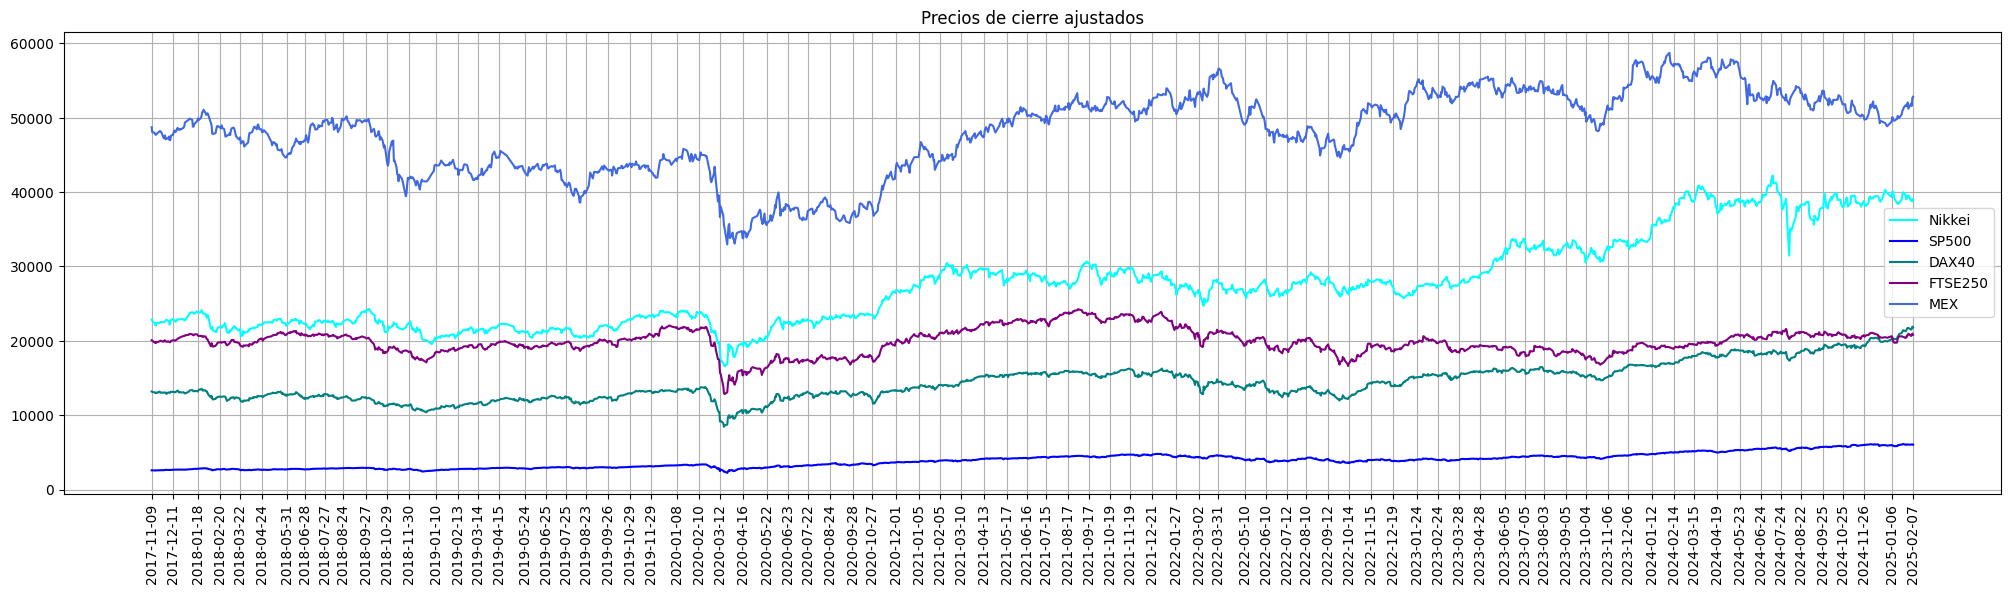

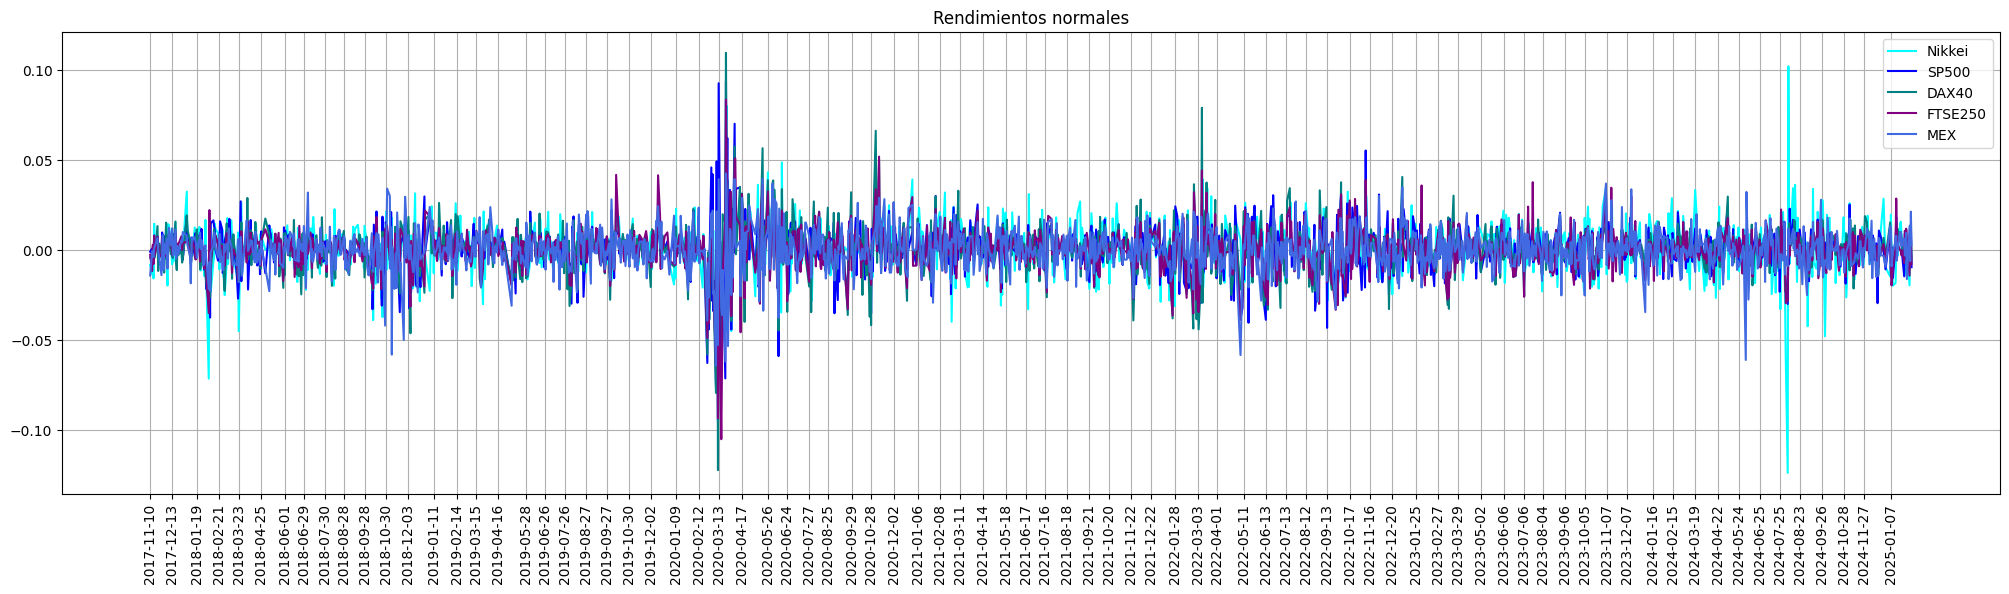

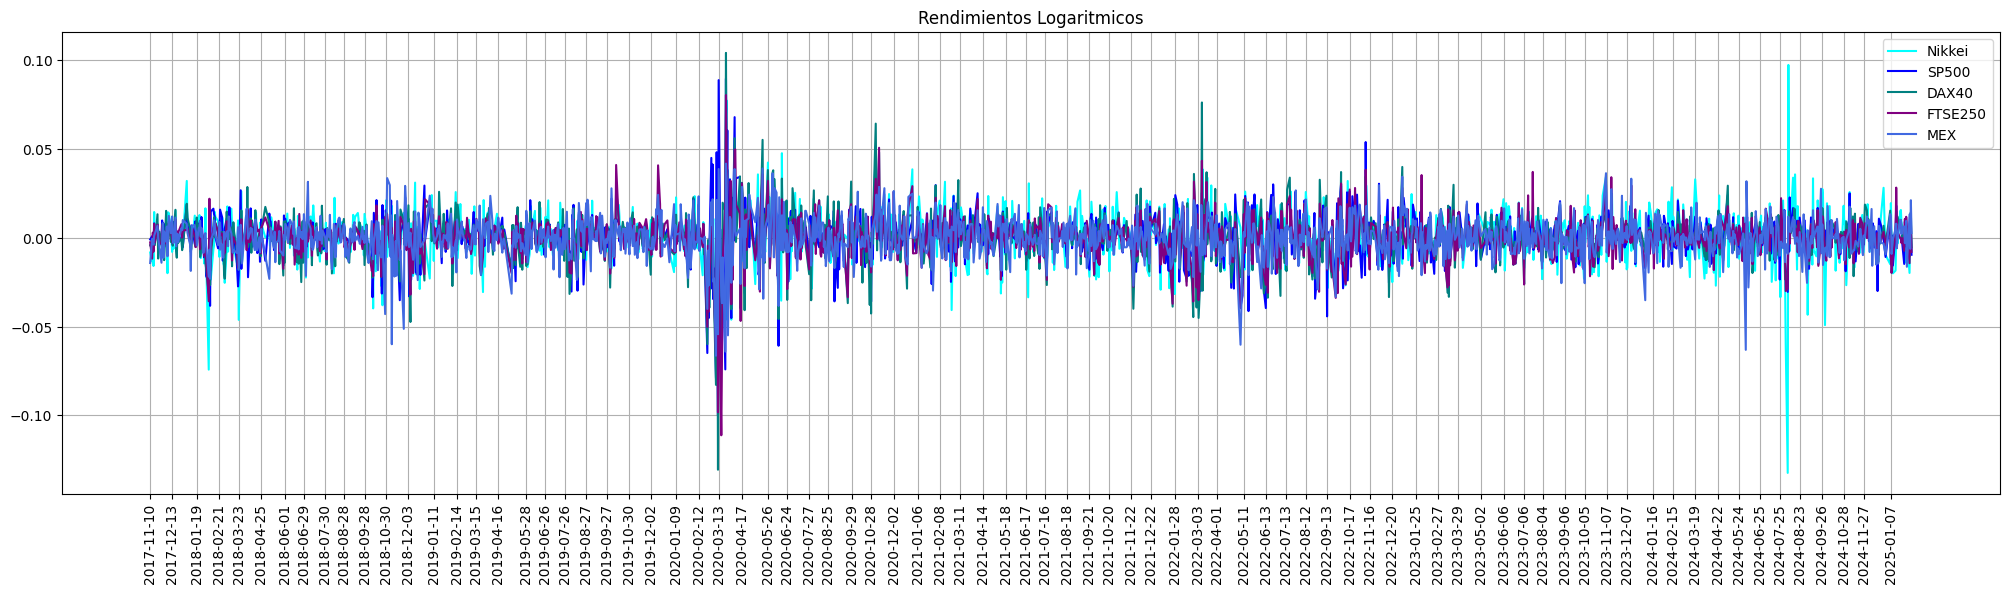

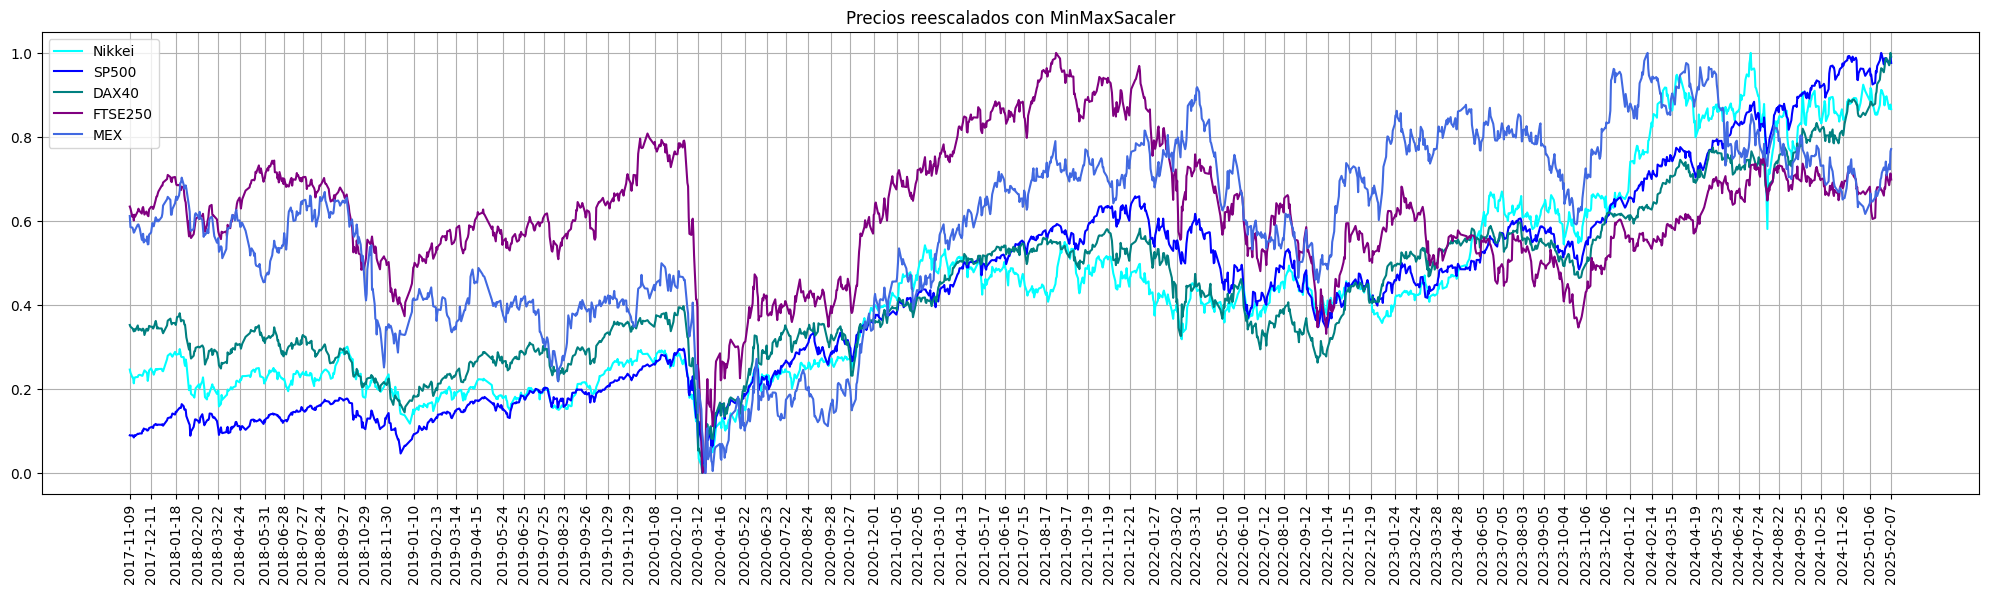

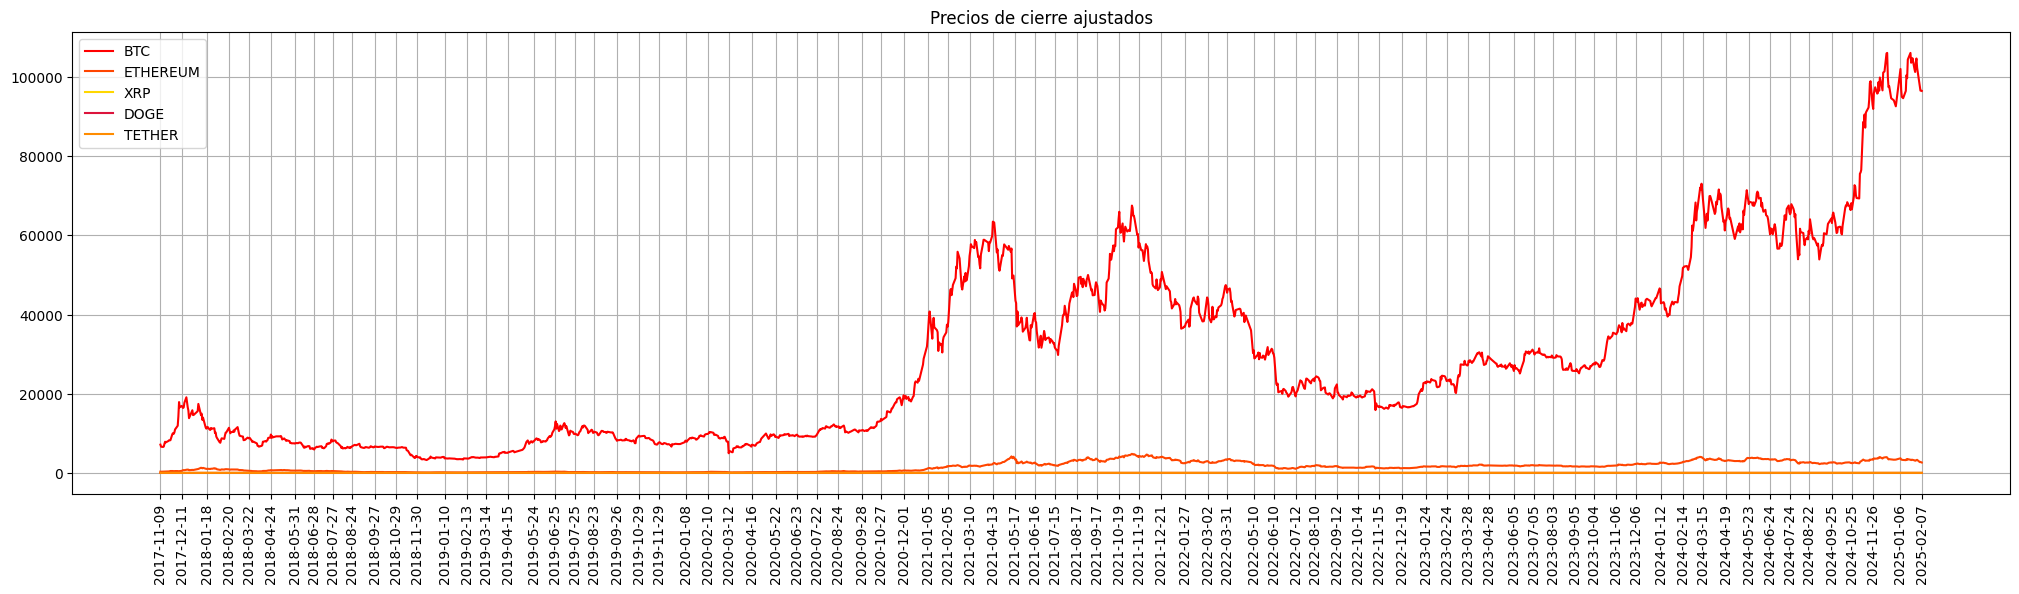

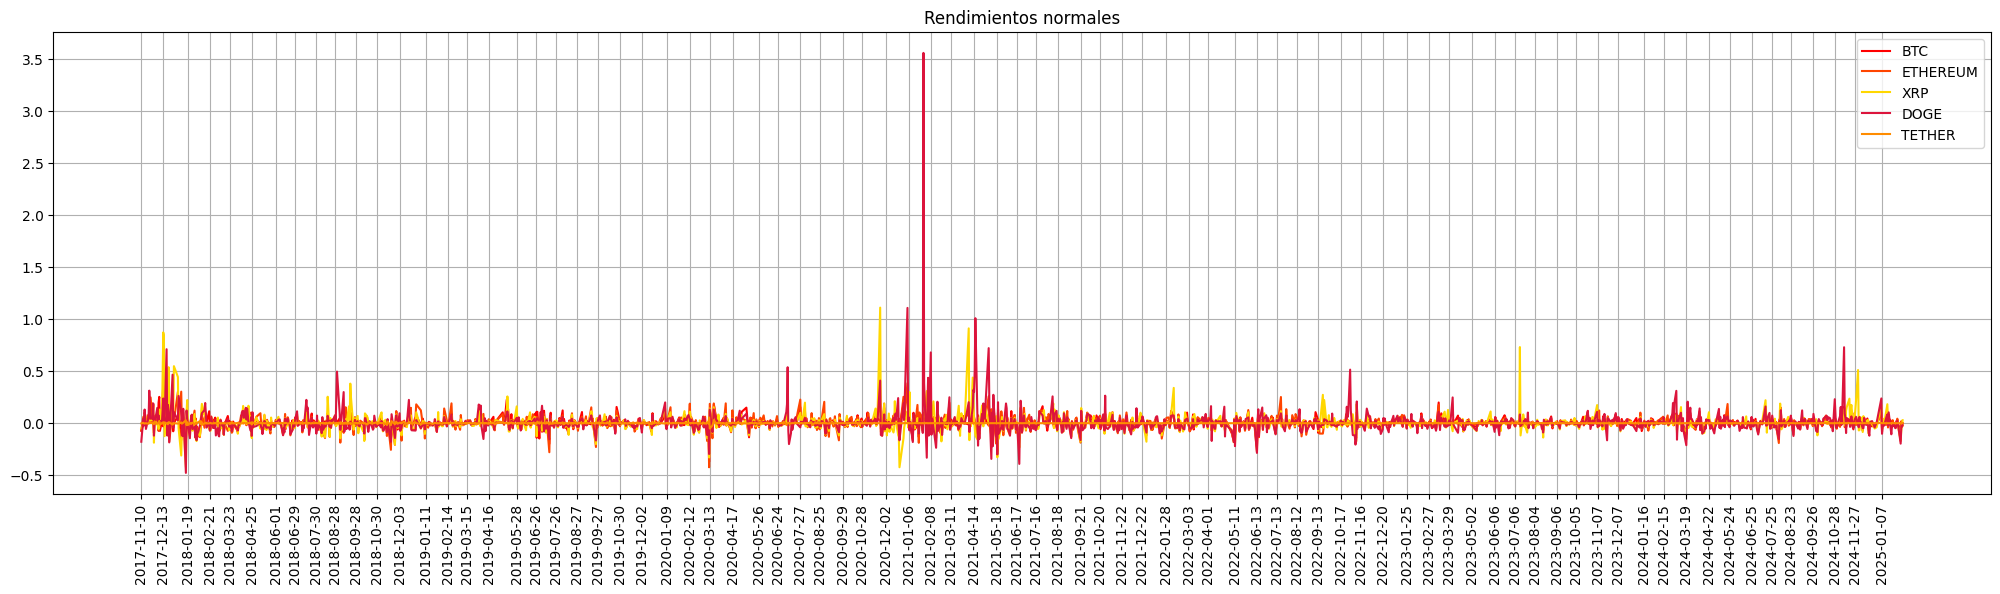

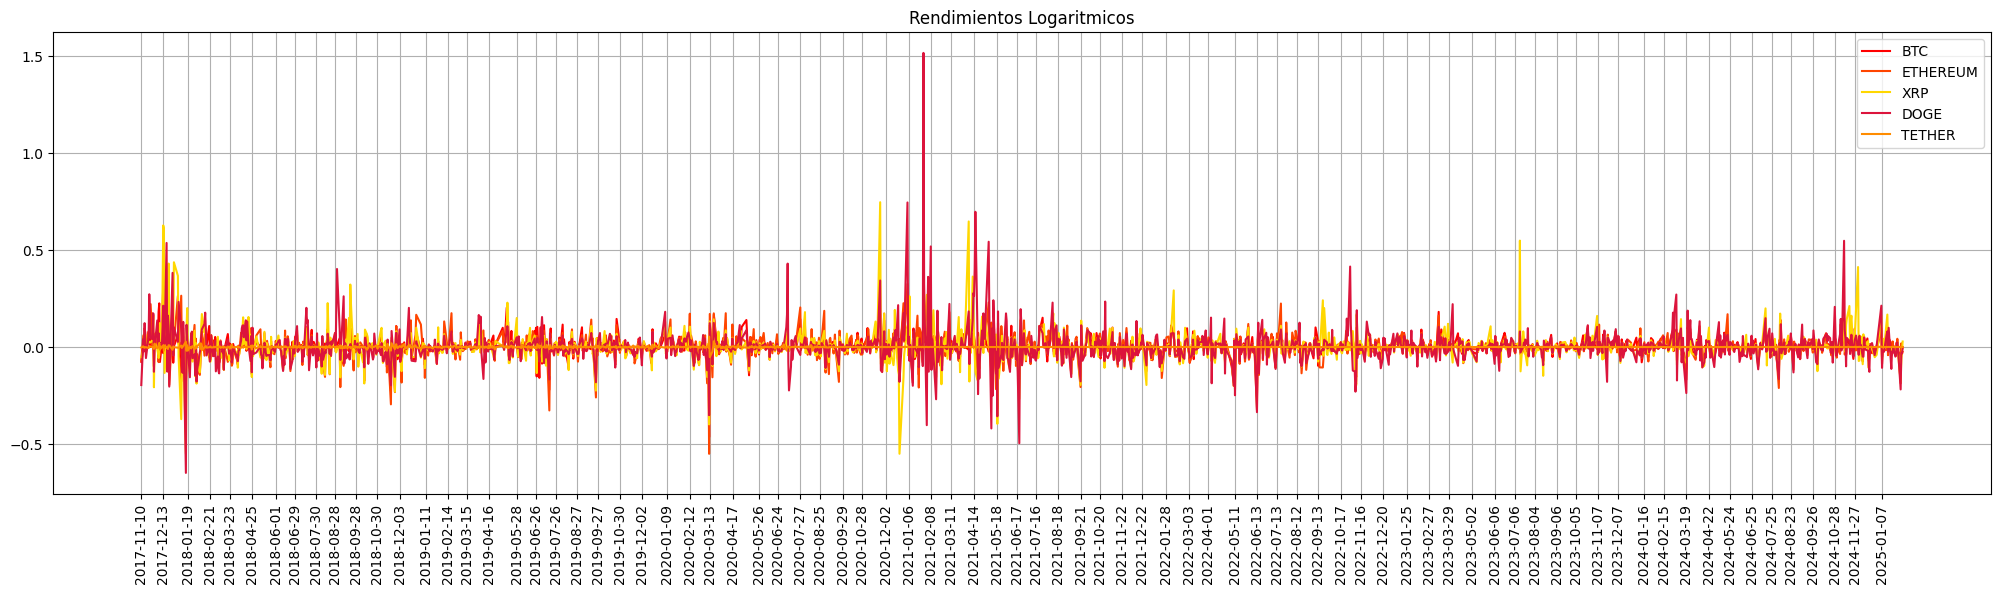

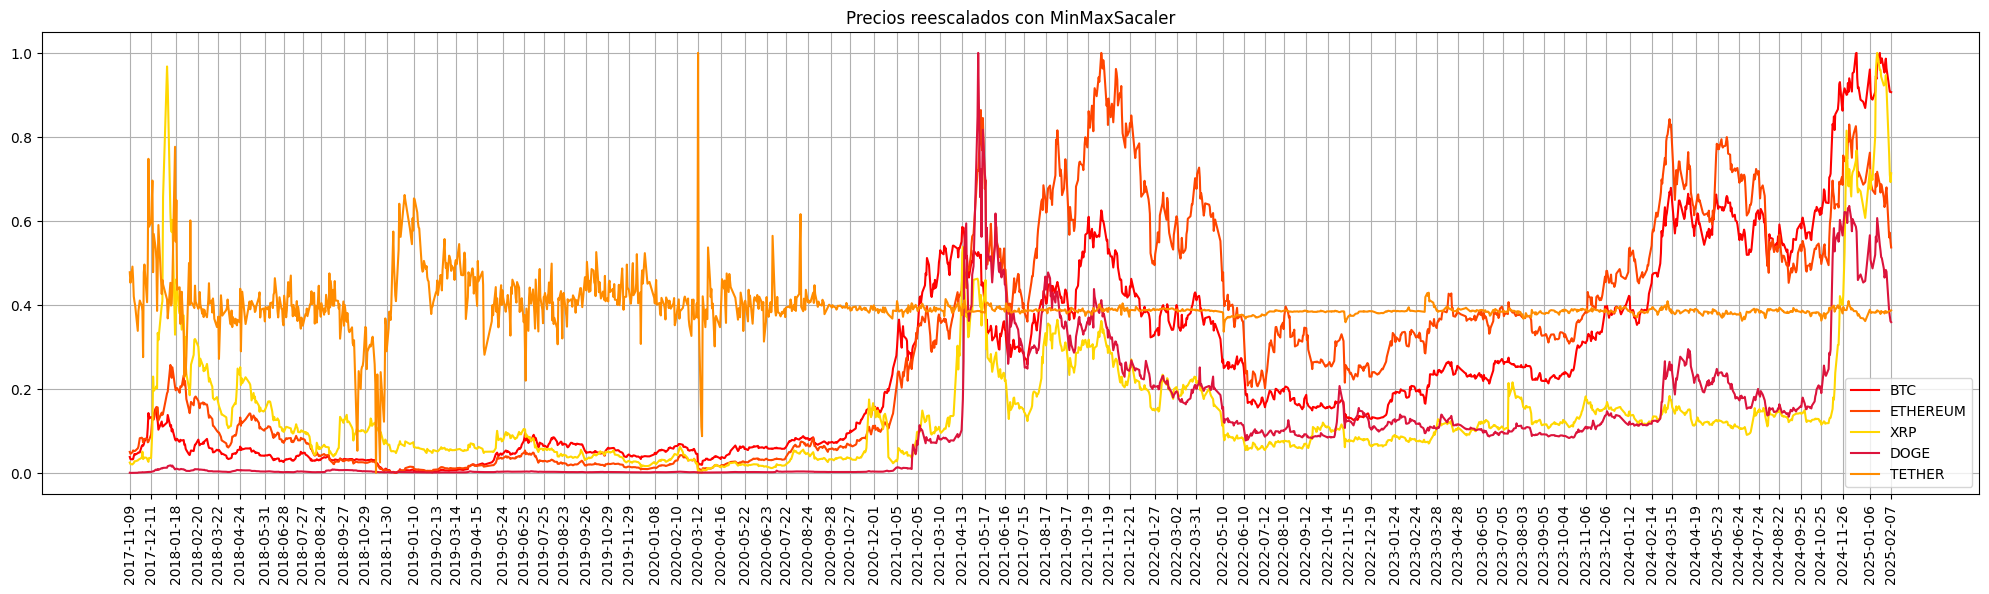

In [8]:
#INDICES
compplot(mt.Precios["Nikkei":"MEX"], "Precios de cierre ajustados", ticks=20)
compplot(mt.N_returns["Nikkei":"MEX"], "Rendimientos normales", ticks=20,)
compplot(mt.Log_returns["Nikkei":"MEX"], "Rendimientos Logaritmicos", ticks=20)
compplot(mt.Minmax["Nikkei":"MEX"], "Precios reescalados con MinMaxSacaler", ticks=20)

#CRIPTOMONEDAS
compplot(mt.Precios["BTC":"TETHER"], "Precios de cierre ajustados", ticks=20)
compplot(mt.N_returns["BTC":"TETHER"], "Rendimientos normales", ticks=20)
compplot(mt.Log_returns["BTC":"TETHER"], "Rendimientos Logaritmicos", ticks=20)
compplot(mt.Minmax["BTC":"TETHER"], "Precios reescalados con MinMaxSacaler", ticks=20)


# Las distribuciones de cada serie

In [9]:
colores = ['cyan', 'blue', 'teal', 'purple', 'royalblue',
           'red', 'orangered', 'gold', 'crimson', 'darkorange']

MATRICES = [mt.Precios.to_numpy(), mt.Minmax.to_numpy(),
            mt.N_returns.to_numpy(), mt.Log_returns.to_numpy()]

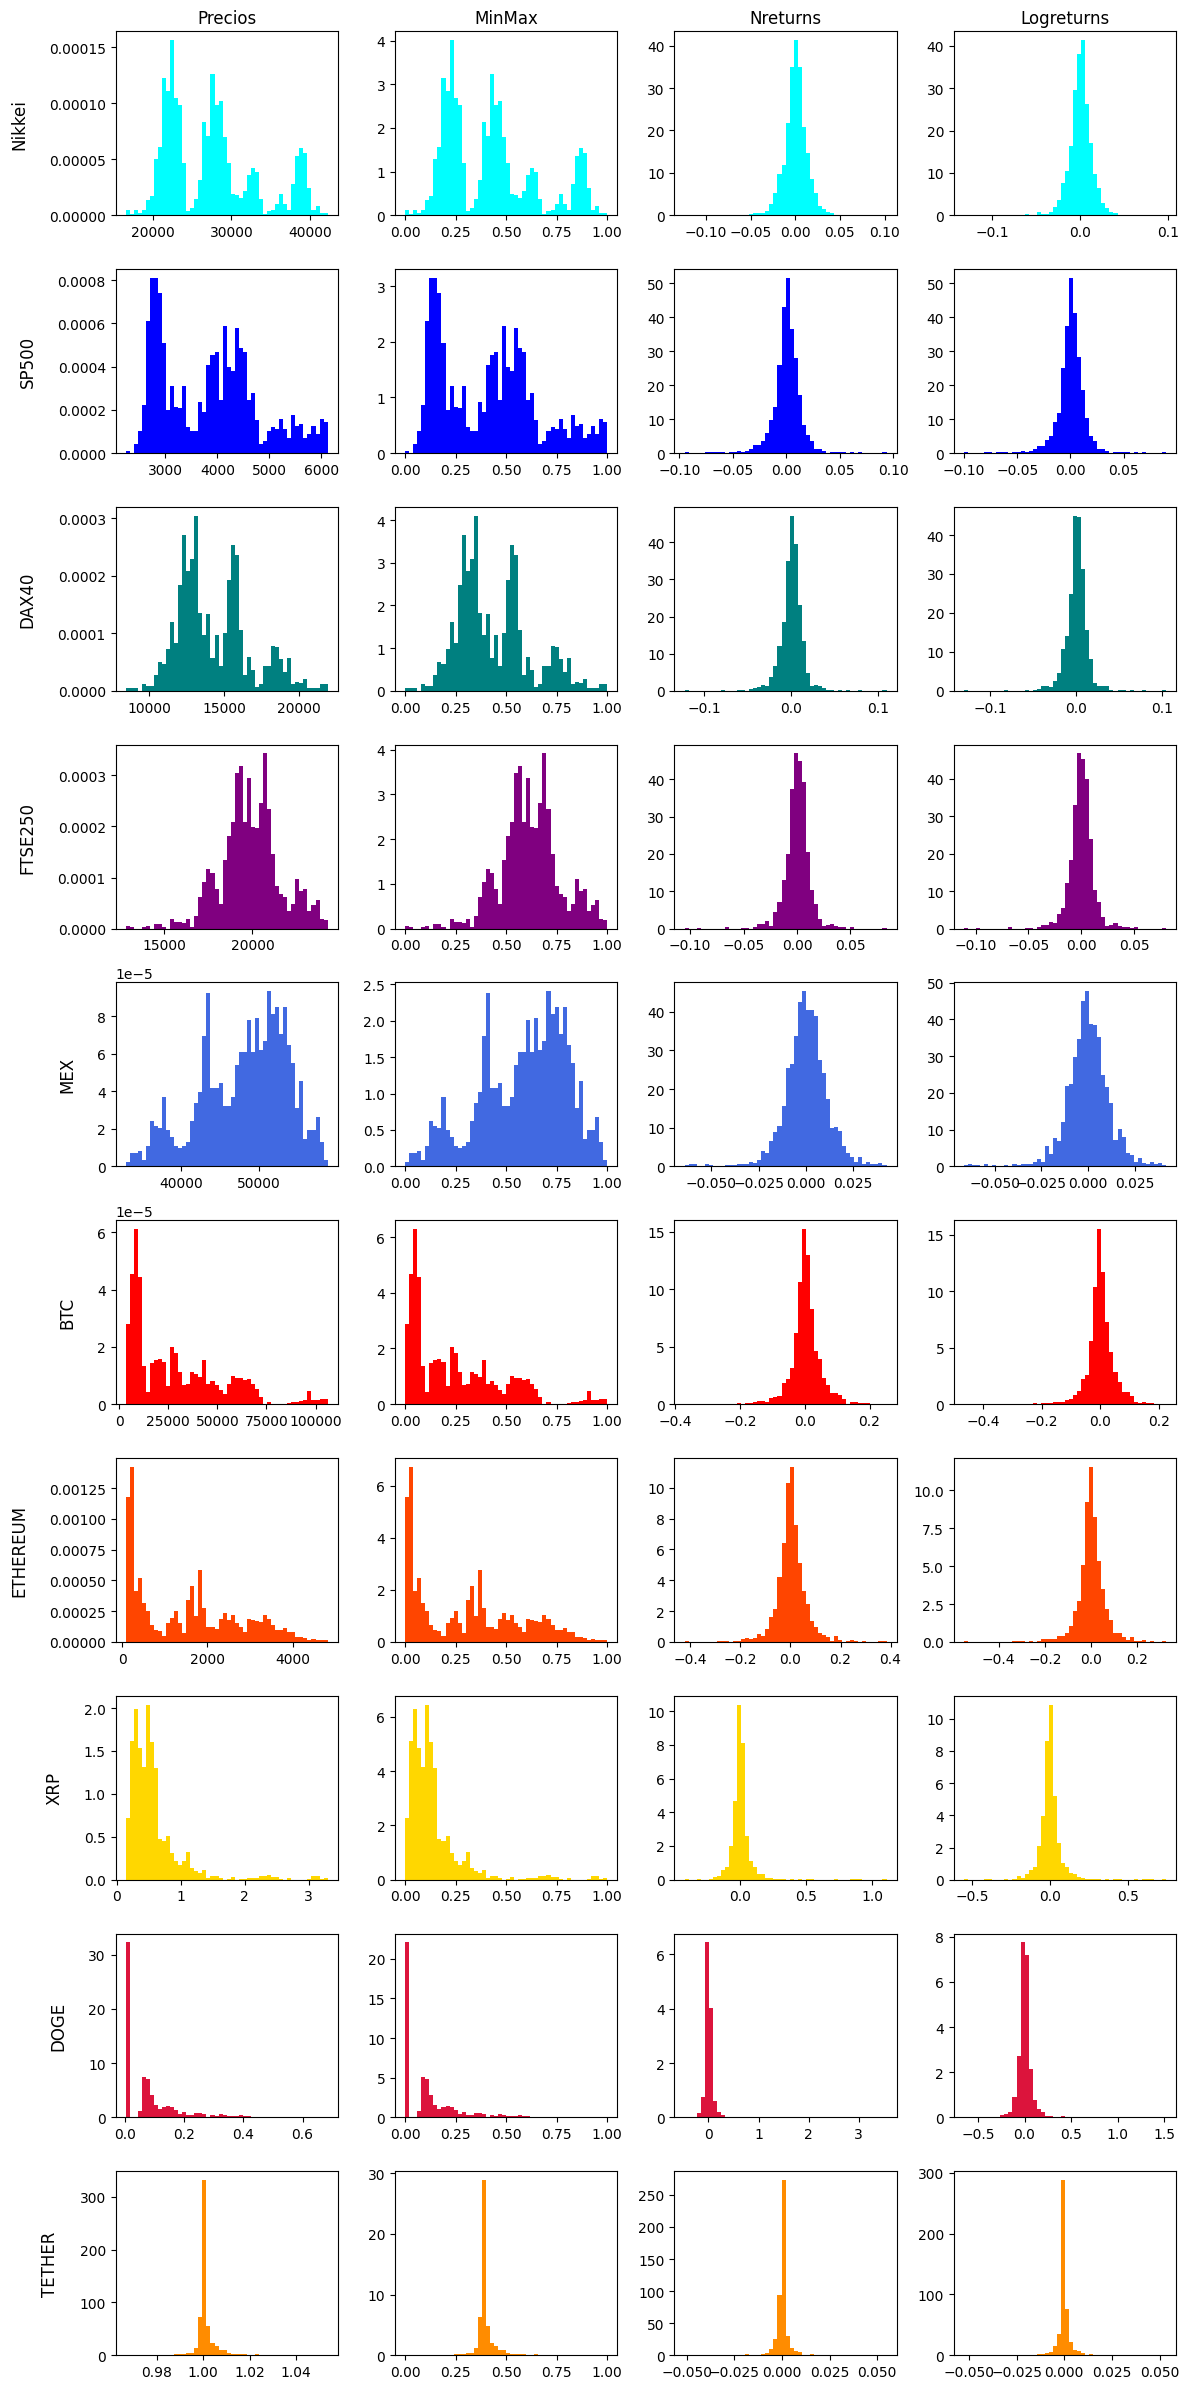

In [10]:
columnas =["Precios", "MinMax", "Nreturns", "Logreturns"]
fig, axes = plt.subplots(10, 4, figsize=(12, 24))
for i in range(10):
    for j in range(4):
        axes[i, j].hist(MATRICES[j][i], bins=50, density=True ,color= colores[i], alpha=1)


#Nombres de columnas
for j, col_name in enumerate(columnas):
    axes[0, j].set_title(col_name, fontsize=12)
# Agregar nombres de filas en el lado izquierdo
for i, row_name in enumerate(mt.Precios.index):
    axes[i, 0].set_ylabel(row_name, fontsize=12, rotation=90, labelpad=15)

plt.tight_layout()
plt.show()

In [11]:
MM_NR = mt.make_df([mt.N_returns.loc[serie] for serie in mt.N_returns.index], mt.minmax)
MM_LR = mt.make_df([mt.Log_returns.loc[serie] for serie in mt.Log_returns.index], mt.minmax)

In [12]:
PCC_nreturns = mt.PCC_matrix(mt.N_returns.to_numpy())
DCC_nreturns = mt.DCC_matrix(mt.N_returns.to_numpy())

PCC_mmnreturns = mt.PCC_matrix(MM_NR.to_numpy())
DCC_mmnreturns = mt.DCC_matrix(MM_NR.to_numpy())

PCC_logreturns = mt.PCC_matrix(mt.Log_returns.to_numpy())
DCC_logreturns = mt.DCC_matrix(mt.Log_returns.to_numpy())

PCC_mmlogreturns = mt.PCC_matrix(MM_LR.to_numpy())
DCC_mmlogreturns = mt.DCC_matrix(MM_LR.to_numpy())

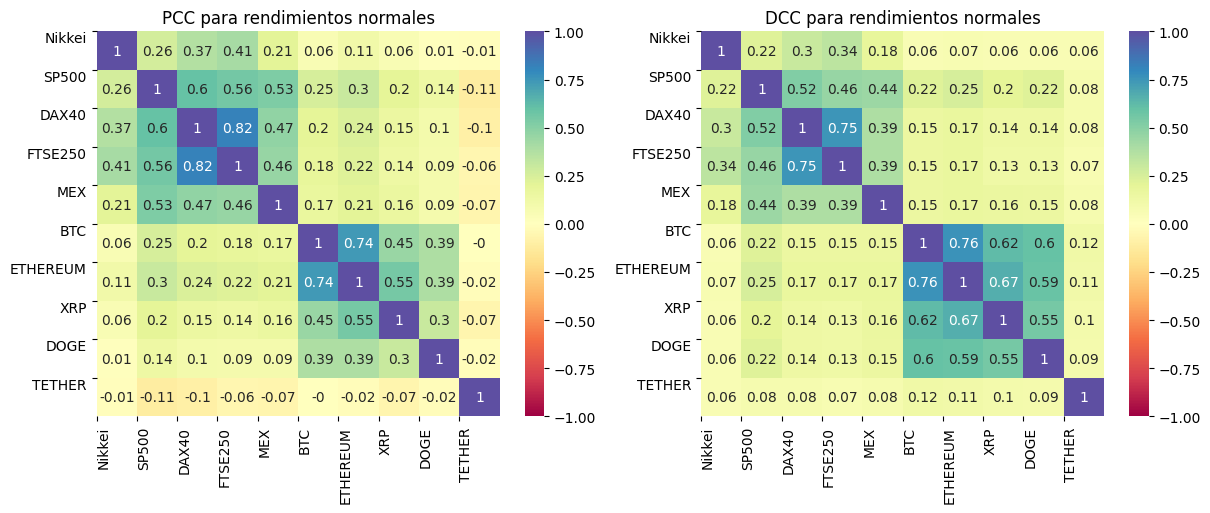

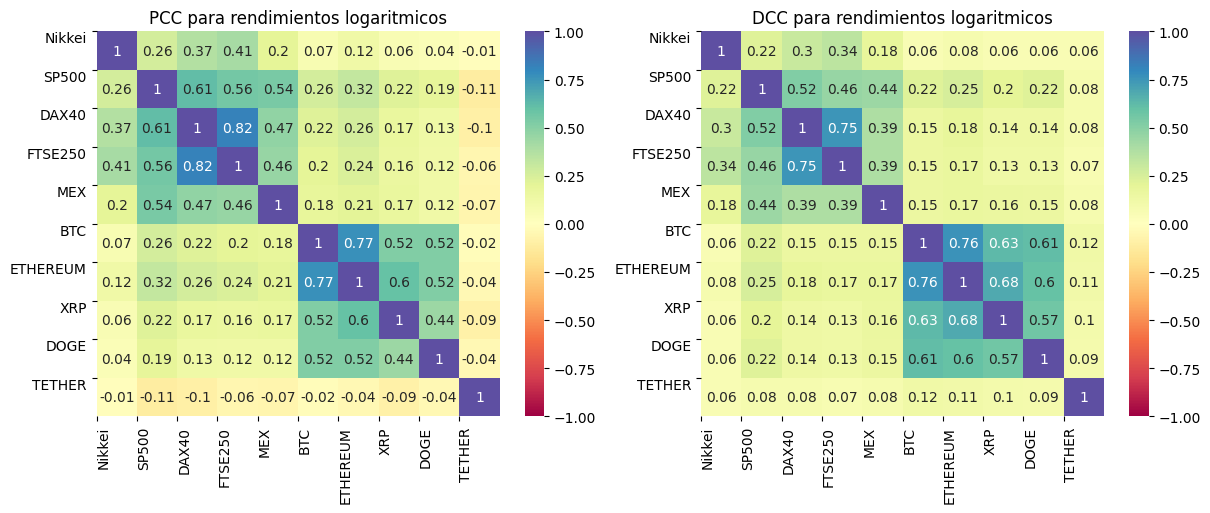

In [13]:
corr_compplot(PCC_nreturns, DCC_nreturns, "PCC para rendimientos normales", "DCC para rendimientos normales")
#corr_compplot(PCC_mmnreturns, DCC_mmnreturns, "PCC para rendimientos normales reescalados", "DCC para rendimientos normales reescalados")
corr_compplot(PCC_logreturns, DCC_logreturns, "PCC para rendimientos logaritmicos", "DCC para rendimientos logaritmicos")
#corr_compplot(PCC_mmlogreturns, DCC_mmlogreturns, "PCC para rendimientos logaritmicos reescalados", "DCC para rendimientos logaritmicos reescalados")

#Calculamos el promedio de correlación:

In [14]:
print(f"PCC promedio para rendimientos normales: {np.round(meanCC(PCC_nreturns), 2)}")
print(f"DCC promedio para rendimientos normales: {np.round(meanCC(DCC_nreturns), 2)}")
print(f"PCC promedio para rendimientos logarítmicos: {np.round(meanCC(PCC_logreturns), 2)}")
print(f"DCC promedio para rendimientos logarítmicos: {np.round(meanCC(DCC_logreturns), 2)}")


PCC promedio para rendimientos normales: 0.23
DCC promedio para rendimientos normales: 0.26
PCC promedio para rendimientos logarítmicos: 0.24
DCC promedio para rendimientos logarítmicos: 0.26


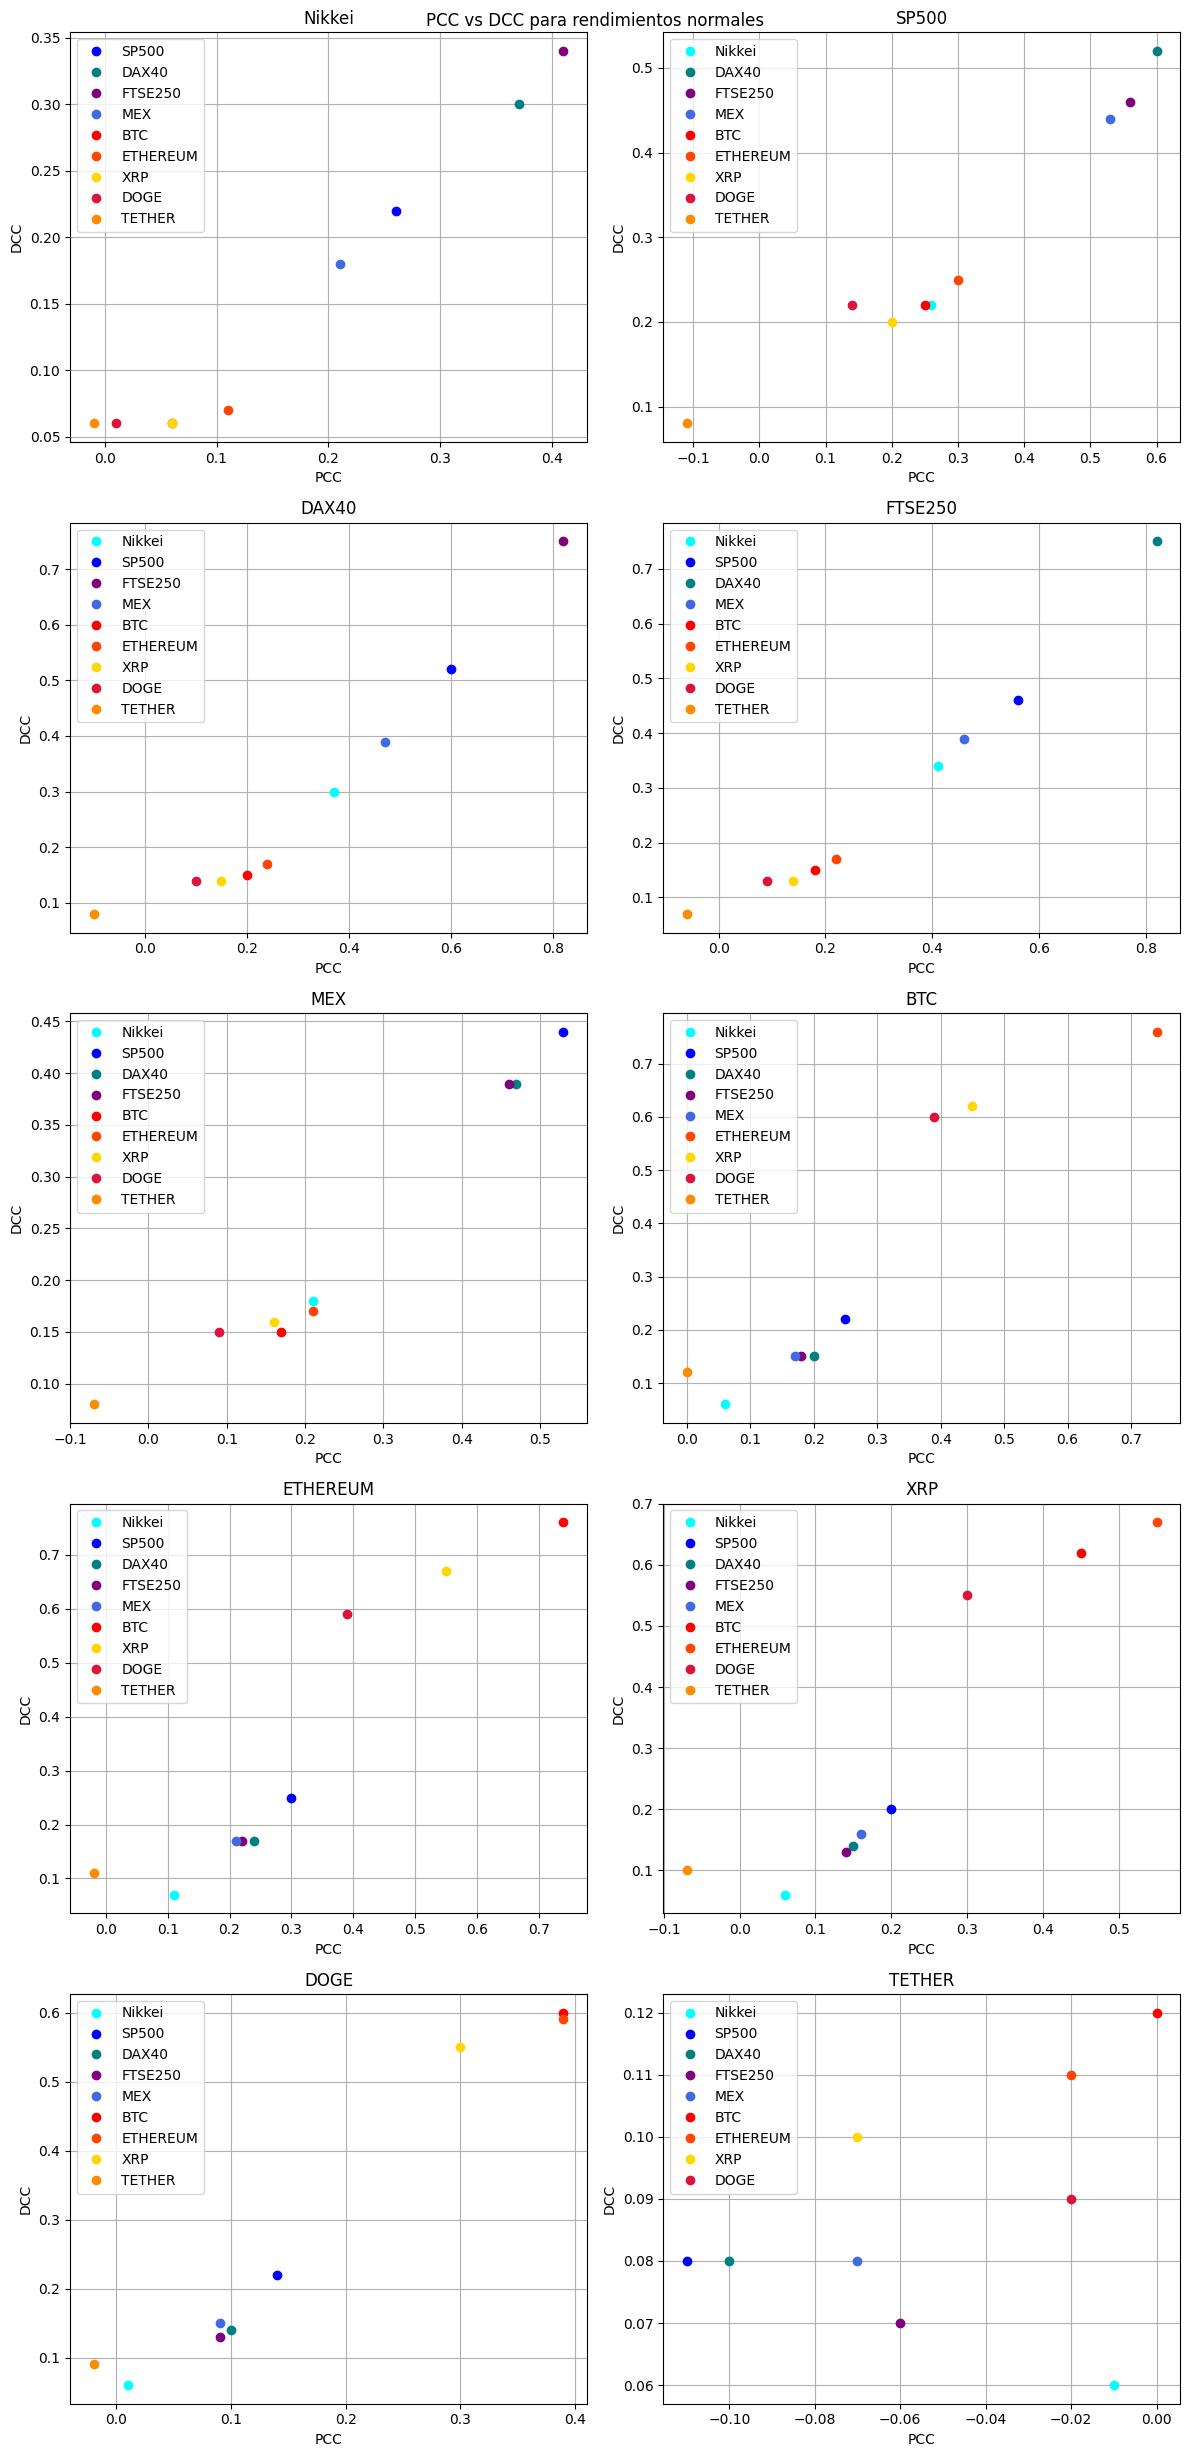

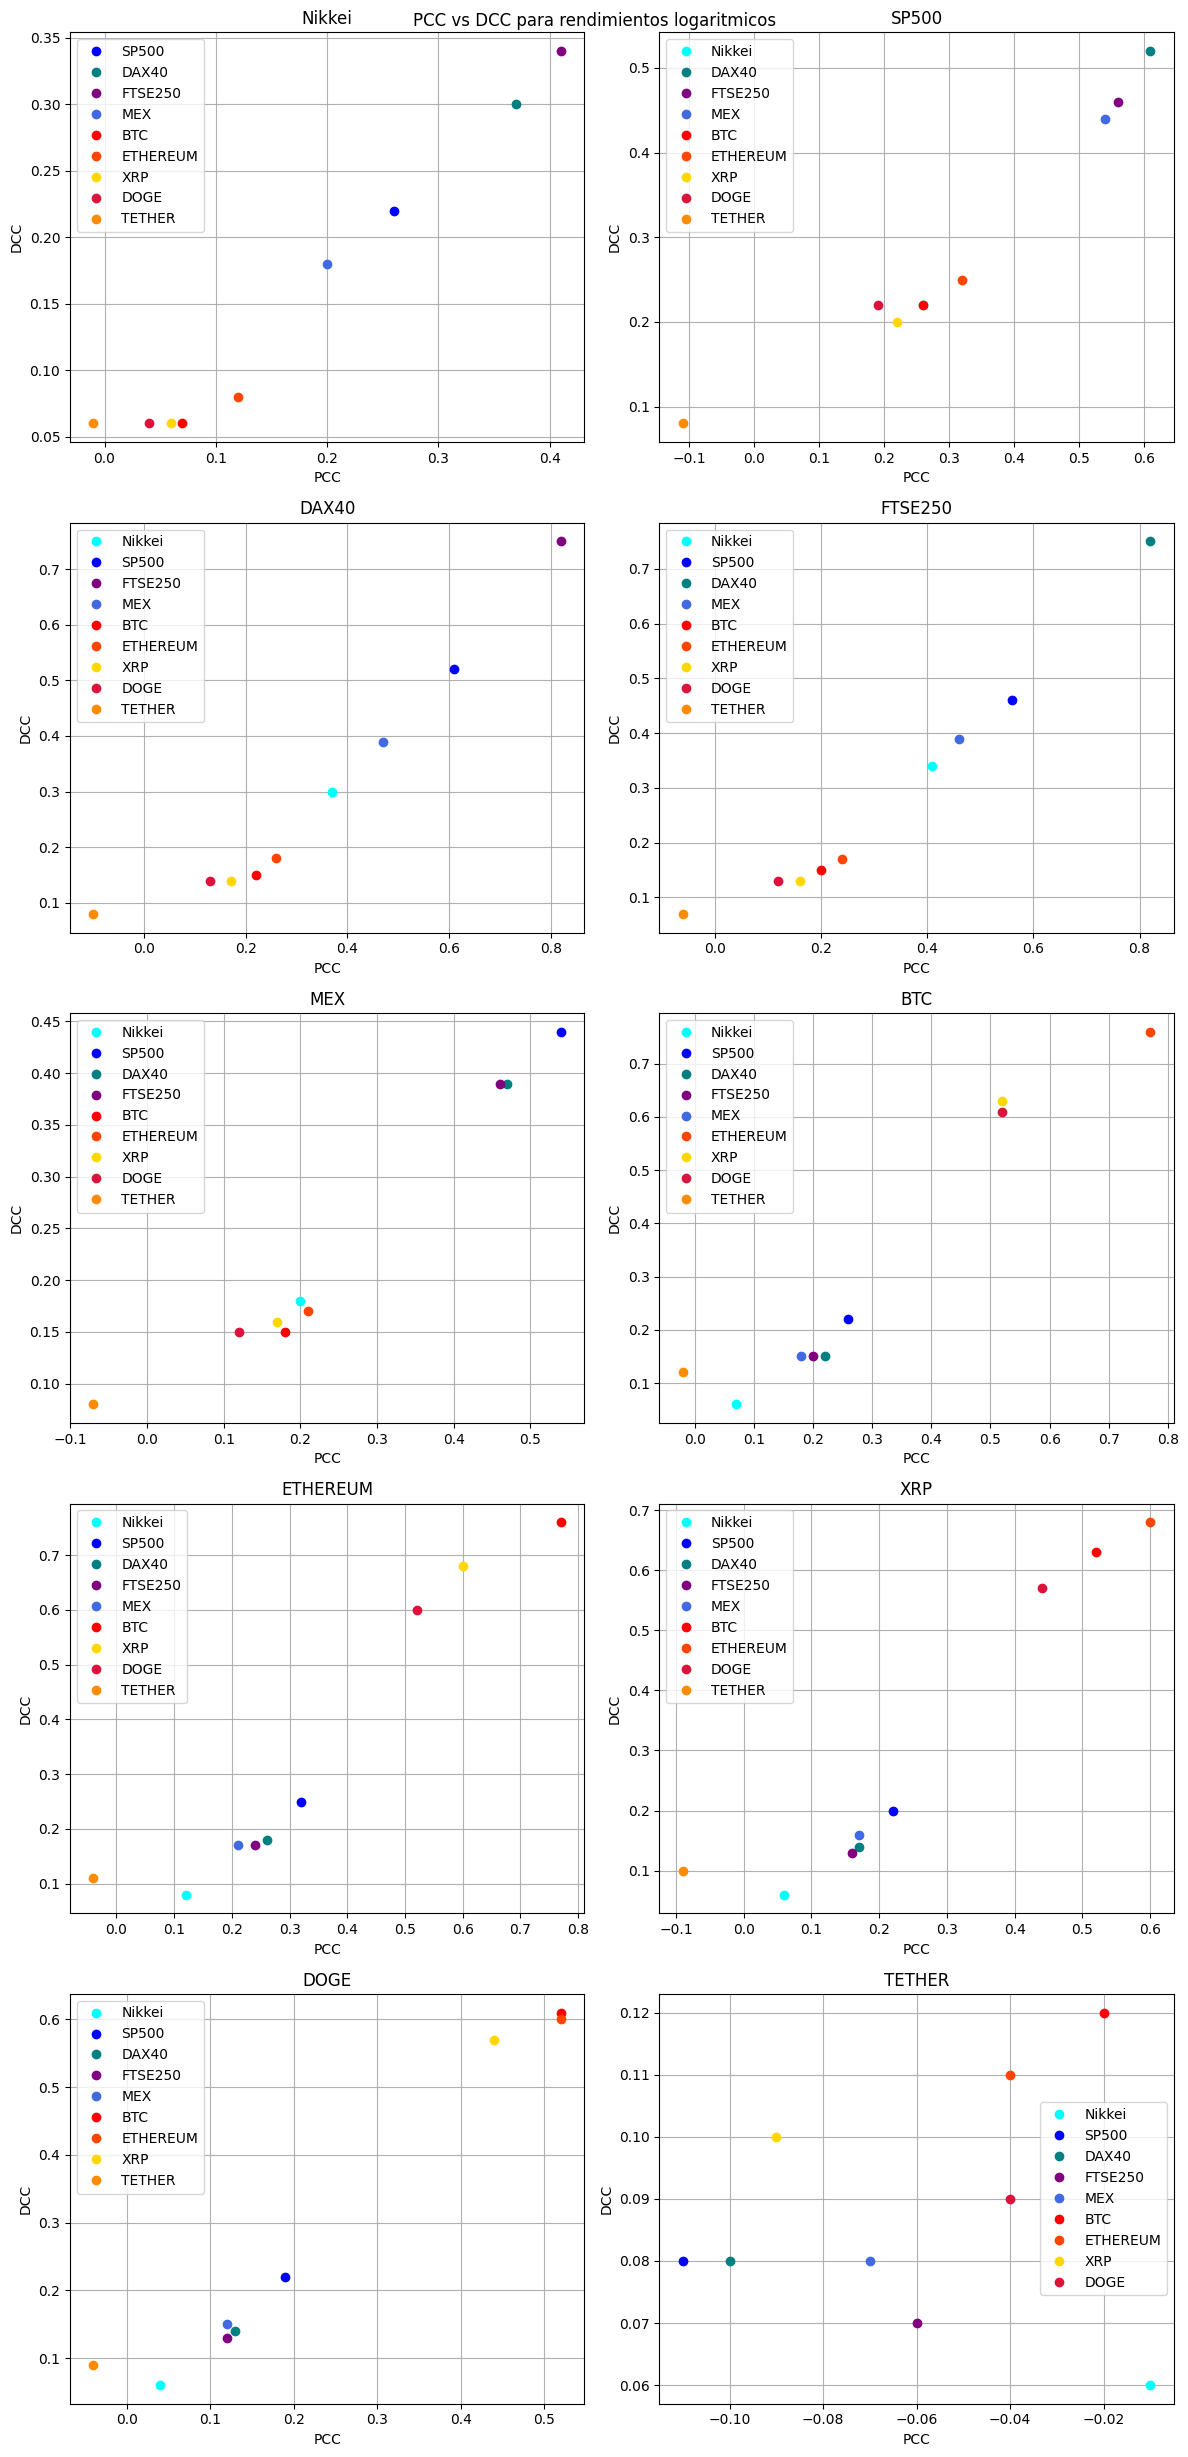

In [15]:
scatter_corr_compplot(PCC_nreturns, DCC_nreturns, "PCC vs DCC para rendimientos normales", mt.Precios.index)
scatter_corr_compplot(PCC_logreturns, DCC_logreturns, "PCC vs DCC para rendimientos logaritmicos", mt.Precios.index)

#La parte más errática de Tether se encuentra en el periodo: 2020-01-06 -- 2020-06-10, añadimos 3 días hábiles antes y 3 días hábiles después, resultando el periodo: 2019-12-23 -- 2020-06-15, el cual dividiremos en épocas de 20 días, sin residuos

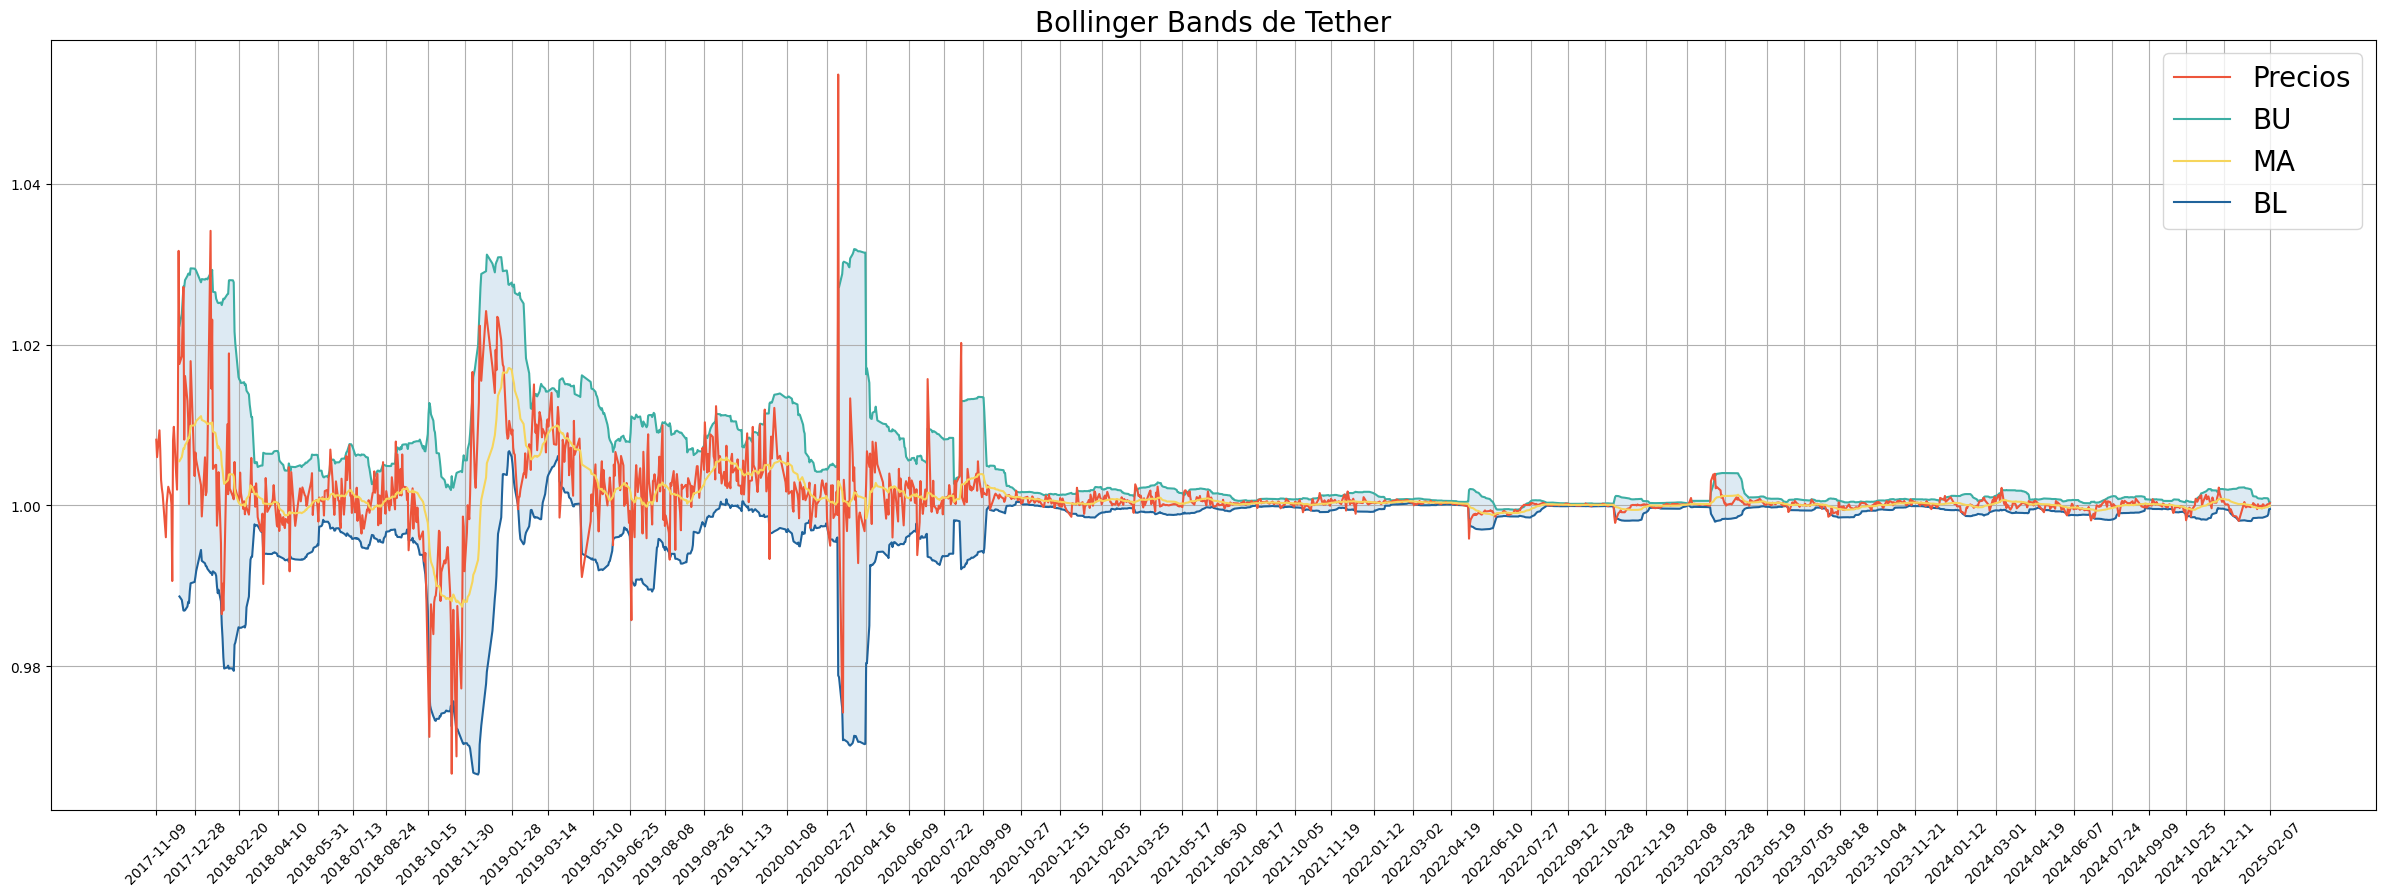

In [16]:
ma, ub, lb = mt.my_plotted_bb(mt.Precios.loc["TETHER"], "Bollinger Bands de Tether", ticks = 30)

# Hacemos zoom en el periodo en cuestión, cada fecha en el eje x es el inicio de una época, la parte más errática se encuentra en la tercera:

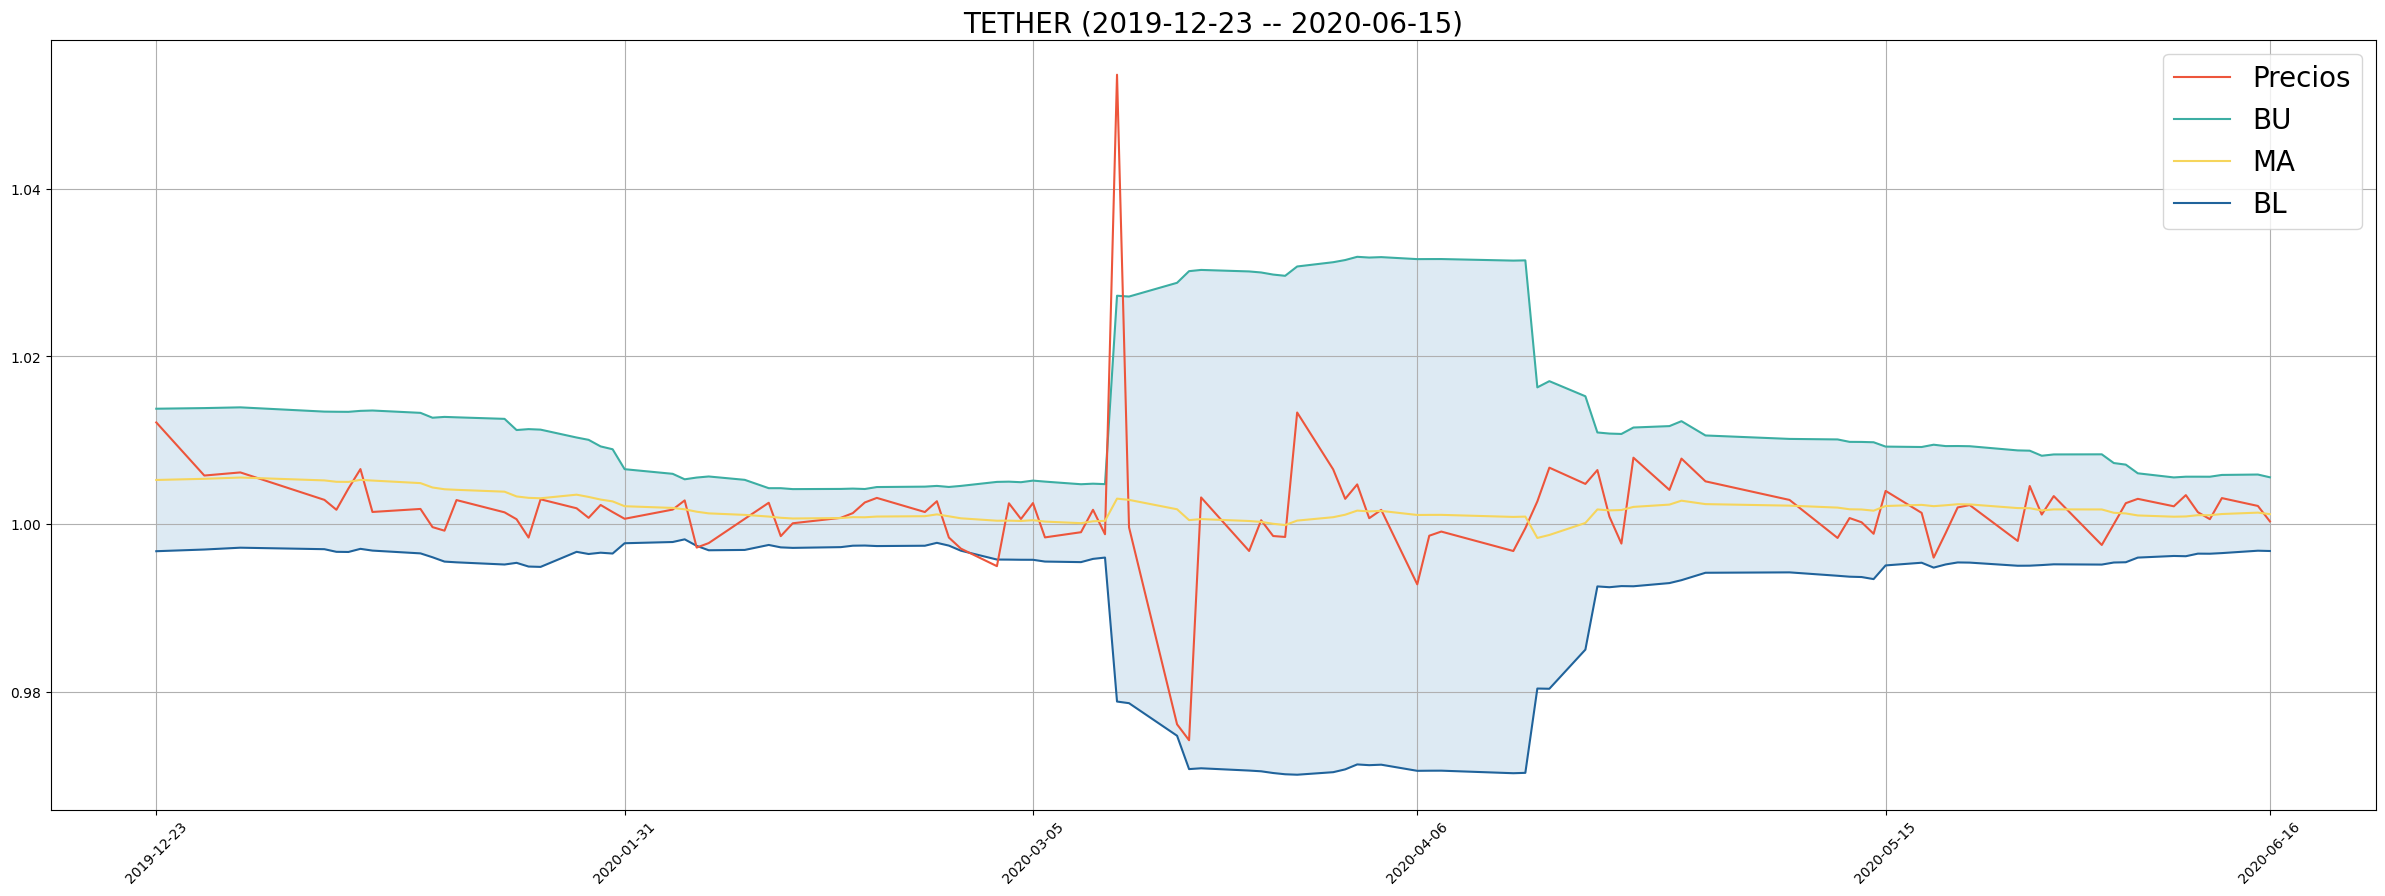

In [17]:
ma, ub, lb = mt.my_plotted_bb(mt.Precios.loc["TETHER"], "TETHER (2019-12-23 -- 2020-06-15)",
                              ticks = 20, ROI = ['2019-12-23','2020-06-16'])

# Los precios de las demás series en ese periodo:

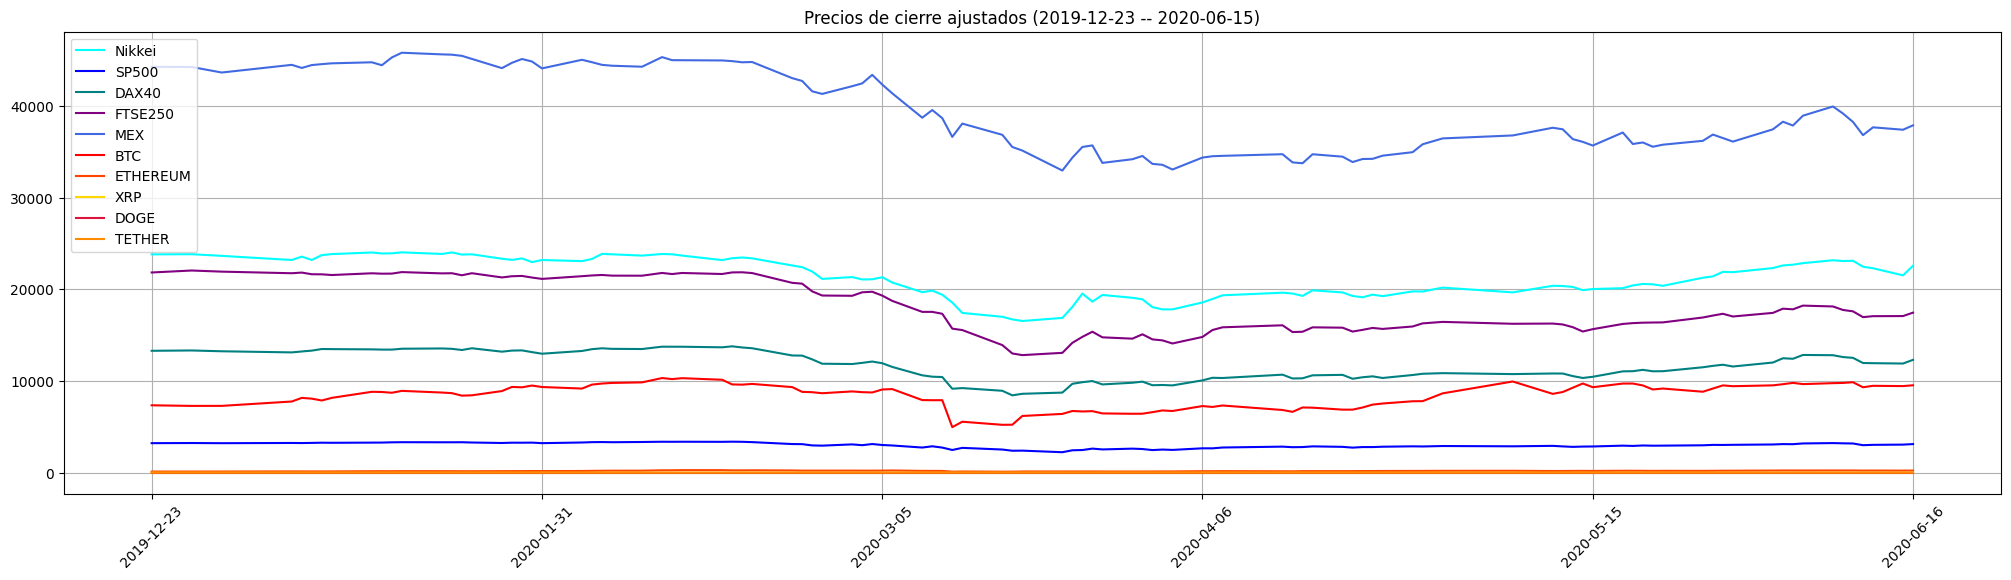

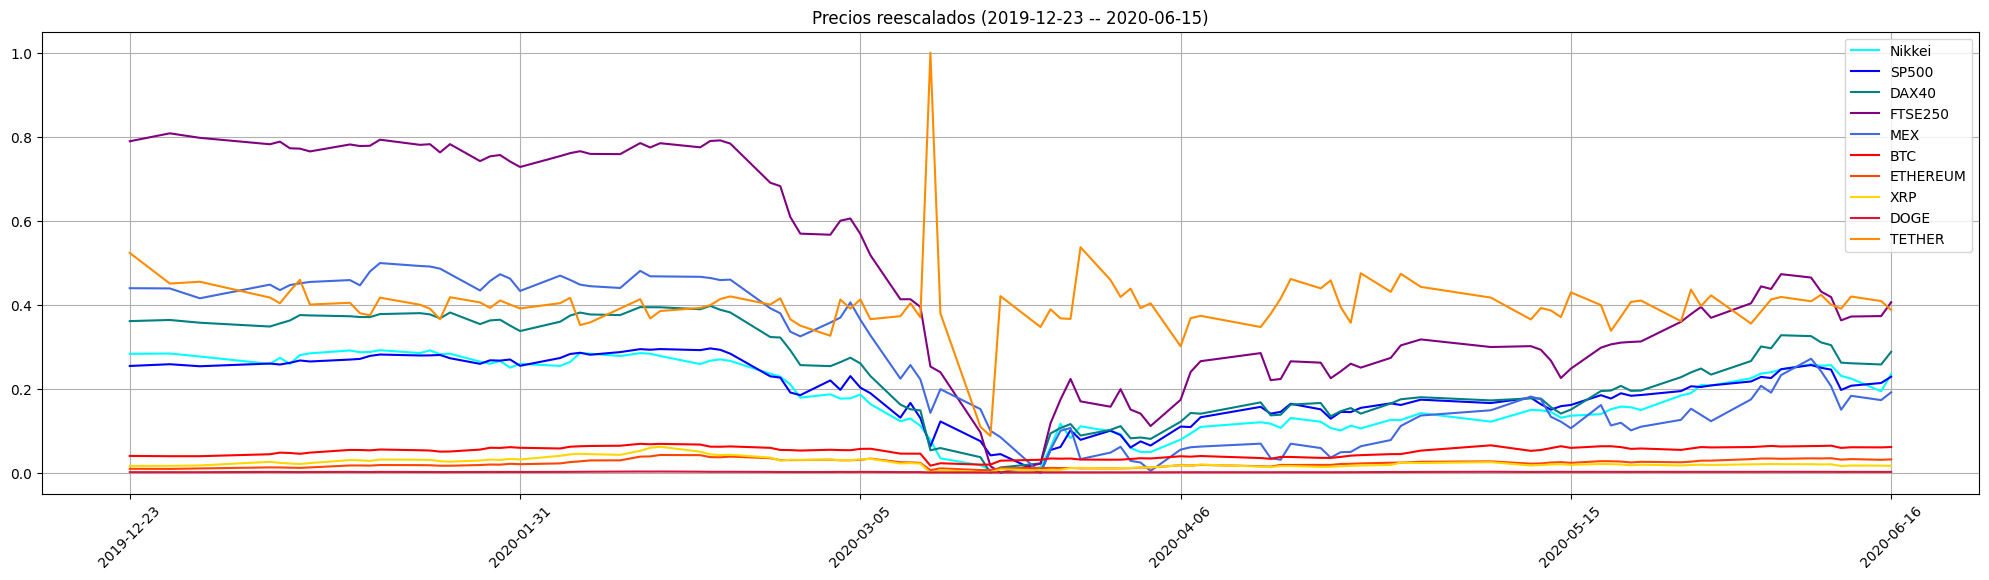

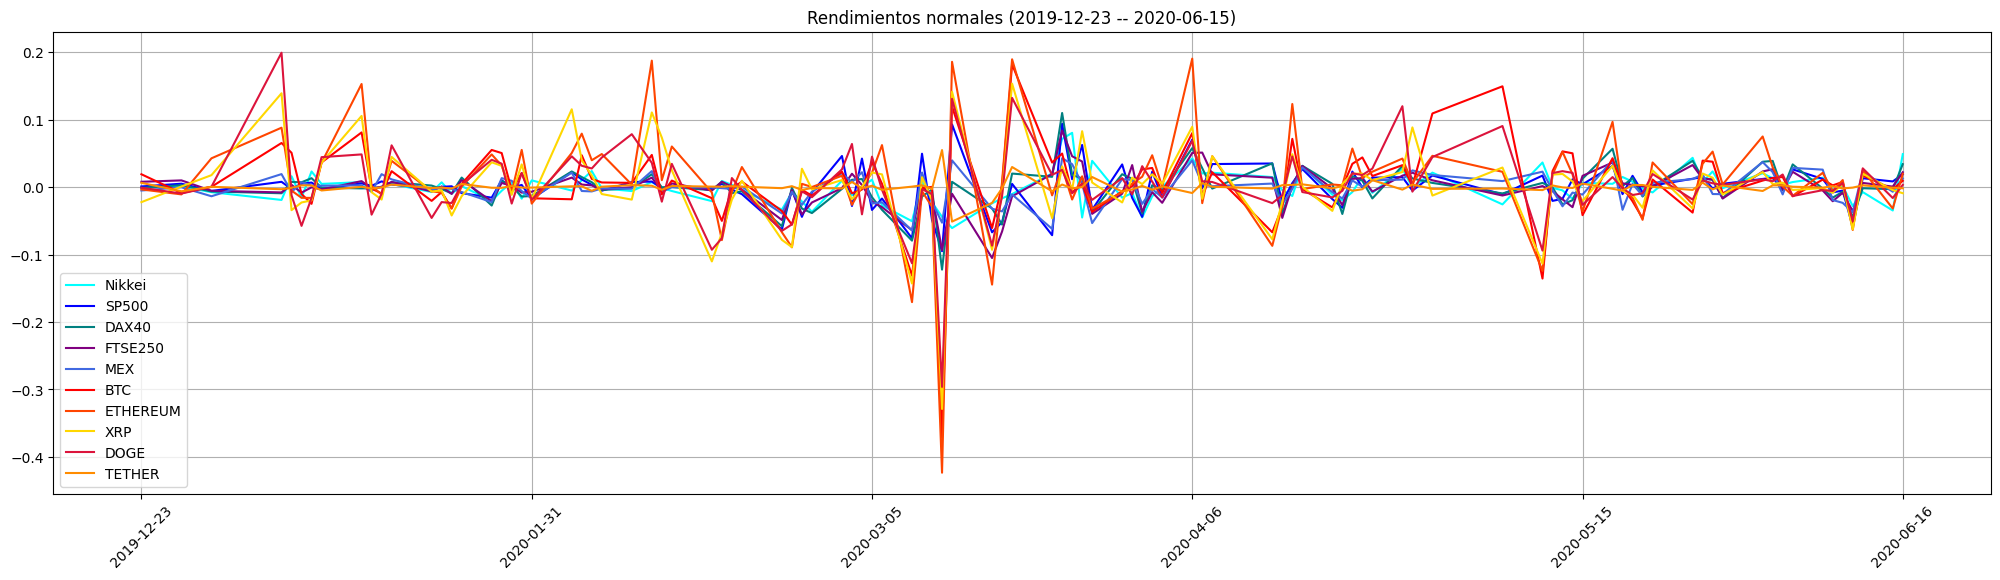

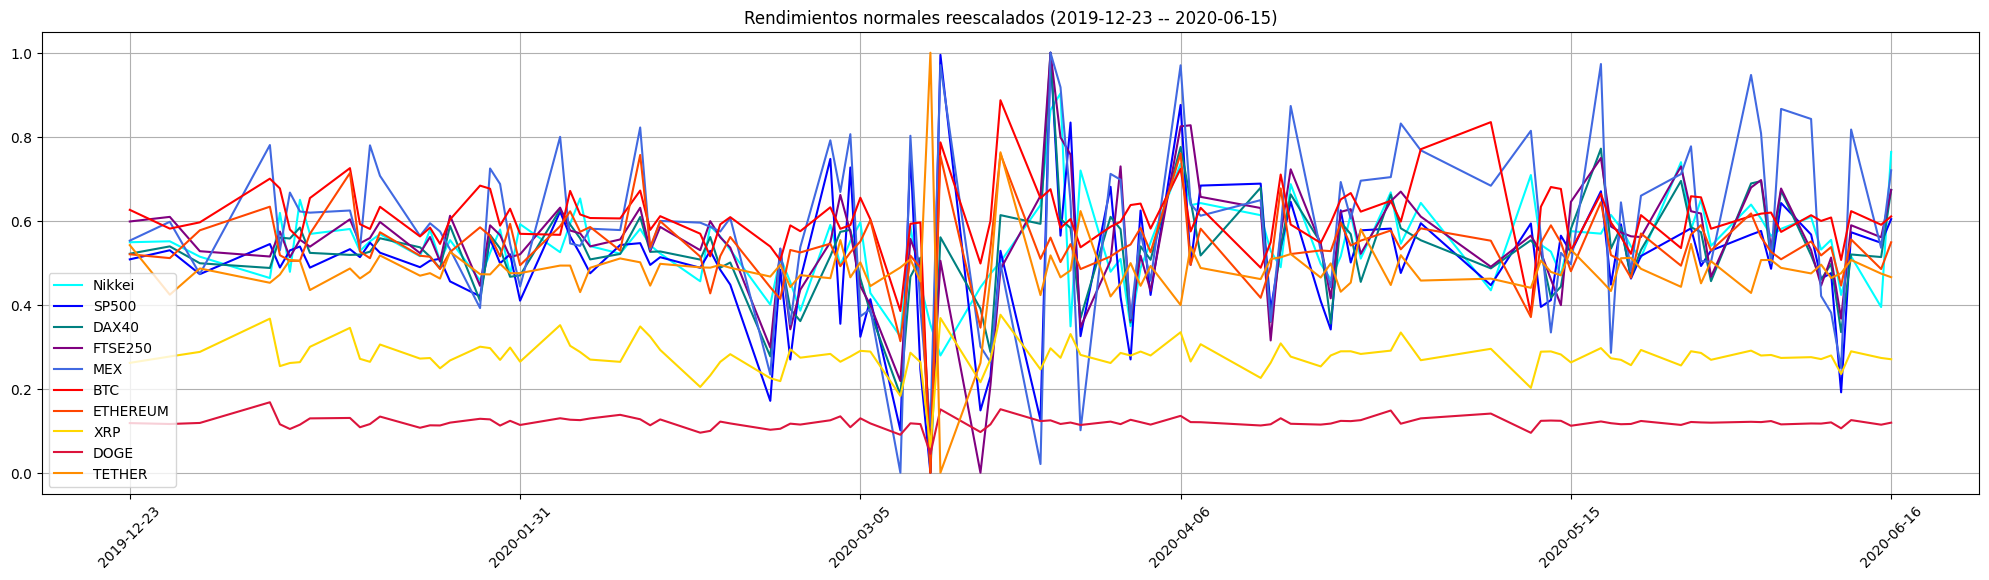

In [18]:
compplot(mt.Precios.loc["Nikkei":"TETHER",'2019-12-23':'2020-06-16'],
         "Precios de cierre ajustados (2019-12-23 -- 2020-06-15)", ticks=20, rotation = 45)

compplot(mt.Minmax.loc["Nikkei":"TETHER",'2019-12-23':'2020-06-16'],
         "Precios reescalados (2019-12-23 -- 2020-06-15)", ticks=20, rotation = 45)

compplot(mt.N_returns.loc["Nikkei":"TETHER",'2019-12-23':'2020-06-16'],
         "Rendimientos normales (2019-12-23 -- 2020-06-15)", ticks=20, rotation = 45)

compplot(MM_NR.loc["Nikkei":"TETHER",'2019-12-23':'2020-06-16'],
         "Rendimientos normales reescalados (2019-12-23 -- 2020-06-15)", ticks=20, rotation = 45)

In [19]:
Epocas, res = mt.split_epochs_df(mt.N_returns.T.loc['2019-12-23':'2020-06-15'].T, dt = 20)
Epocas_log, res_log = mt.split_epochs_df(mt.Log_returns.T.loc['2019-12-23':'2020-06-15'].T, dt = 20)


In [20]:
for s in Epocas:
  print(s.shape)
  print(s.columns[0], s.columns[19])

(10, 20)
2019-12-23 00:00:00 2020-01-30 00:00:00
(10, 20)
2020-01-31 00:00:00 2020-03-04 00:00:00
(10, 20)
2020-03-05 00:00:00 2020-04-03 00:00:00
(10, 20)
2020-04-06 00:00:00 2020-05-14 00:00:00
(10, 20)
2020-05-15 00:00:00 2020-06-15 00:00:00


In [21]:
# CALCULAMOS LOS CC DE CADA ÉPOCA:

#NORMAL RETURNS
PCC_epocas = np.zeros((5,10,10))
DCC_epocas = np.zeros((5,10,10))
for df, i in zip(Epocas, range(5)):
  PCC_epocas[i] = mt.PCC_matrix(df.to_numpy())
  DCC_epocas[i] = mt.DCC_matrix(df.to_numpy())

#LOG RETURNS
PCC_epocas_log = np.zeros((5,10,10))
DCC_epocas_log = np.zeros((5,10,10))
for df, i in zip(Epocas_log, range(5)):
  PCC_epocas_log[i] = mt.PCC_matrix(df.to_numpy())
  DCC_epocas_log[i] = mt.DCC_matrix(df.to_numpy())

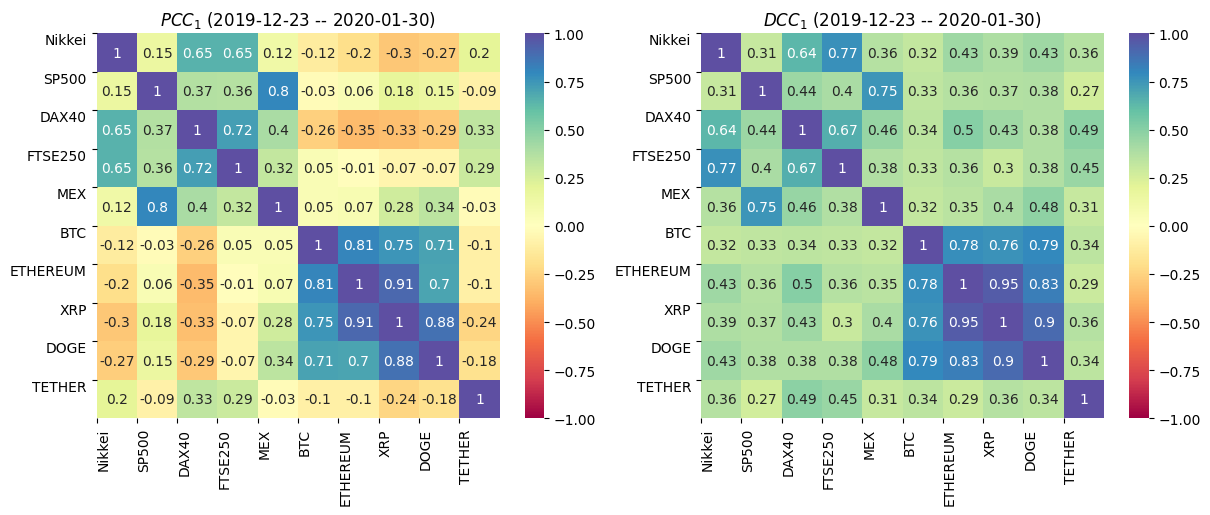

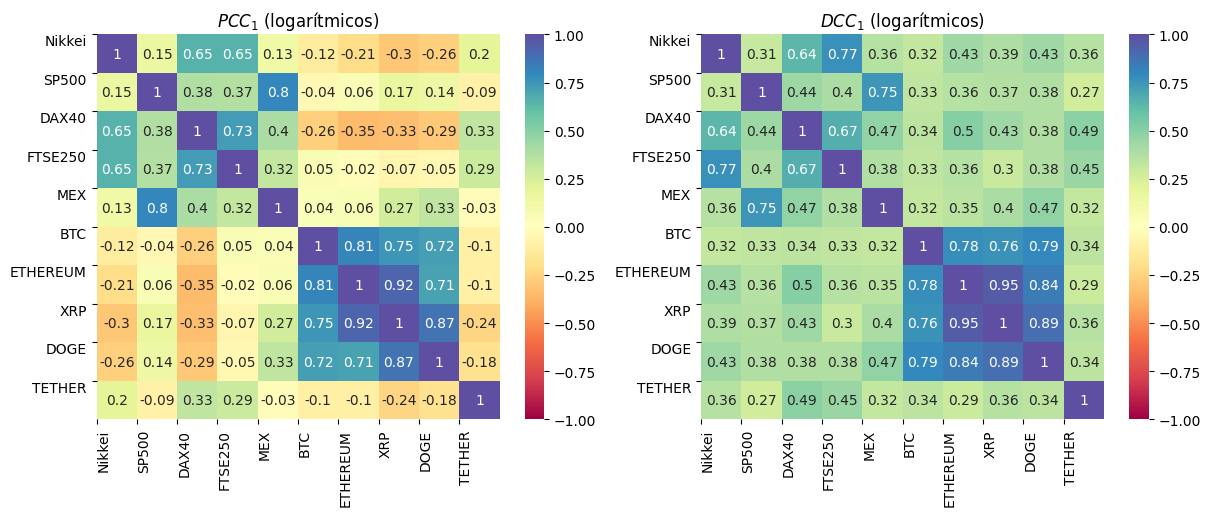

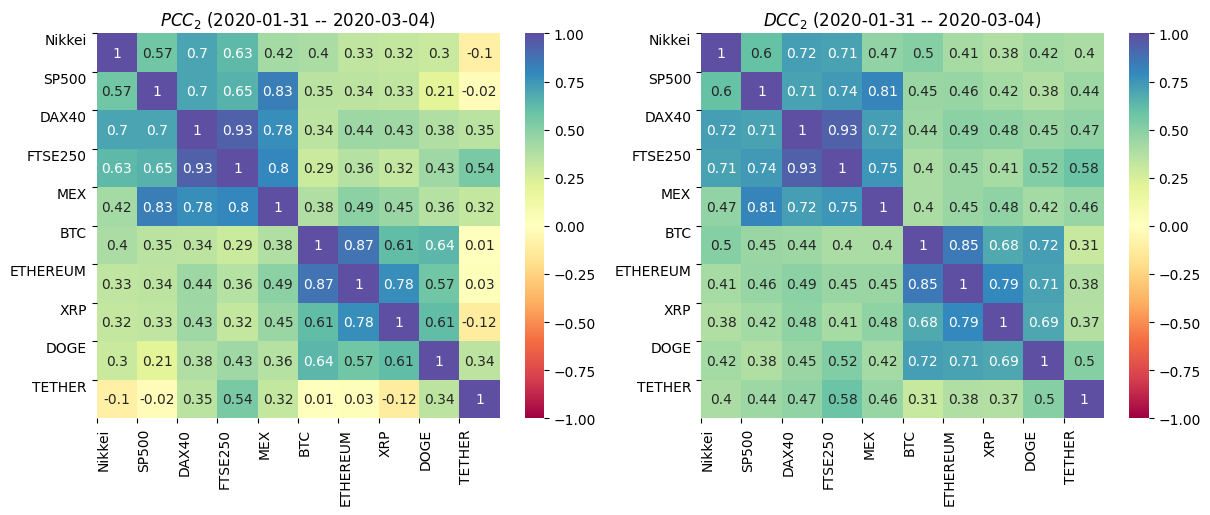

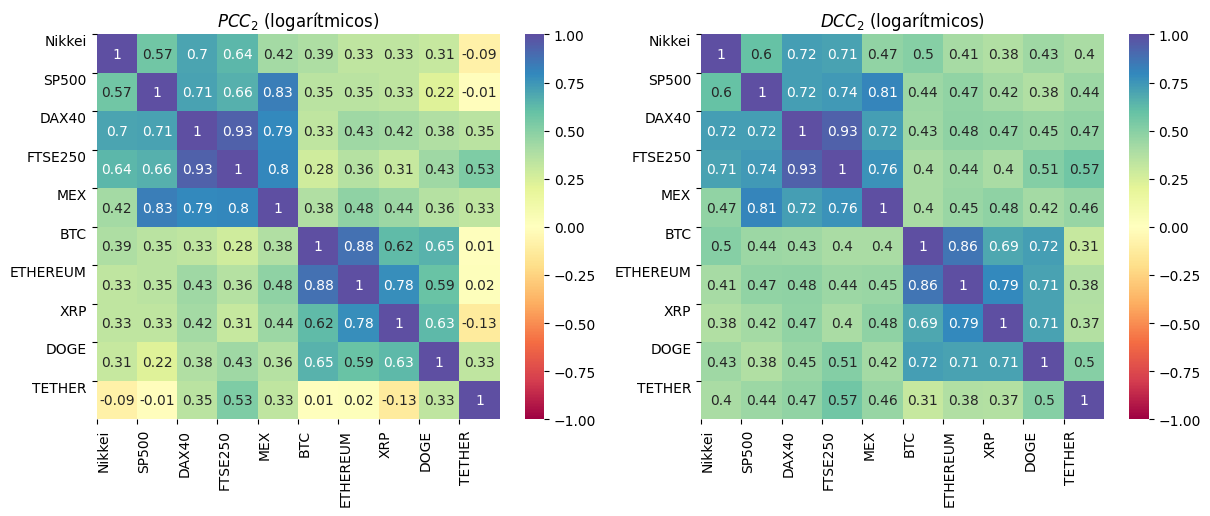

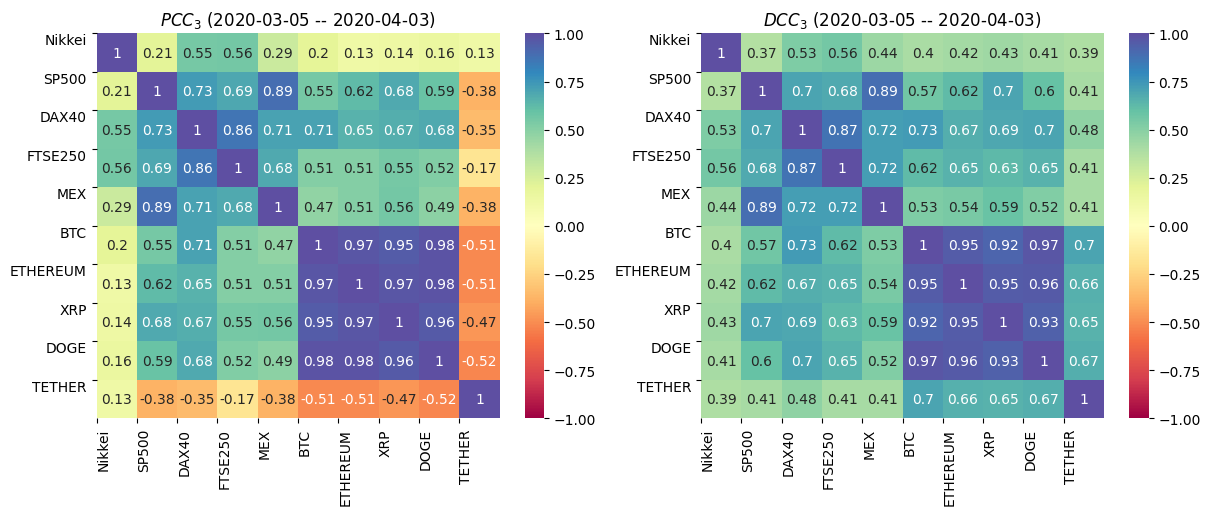

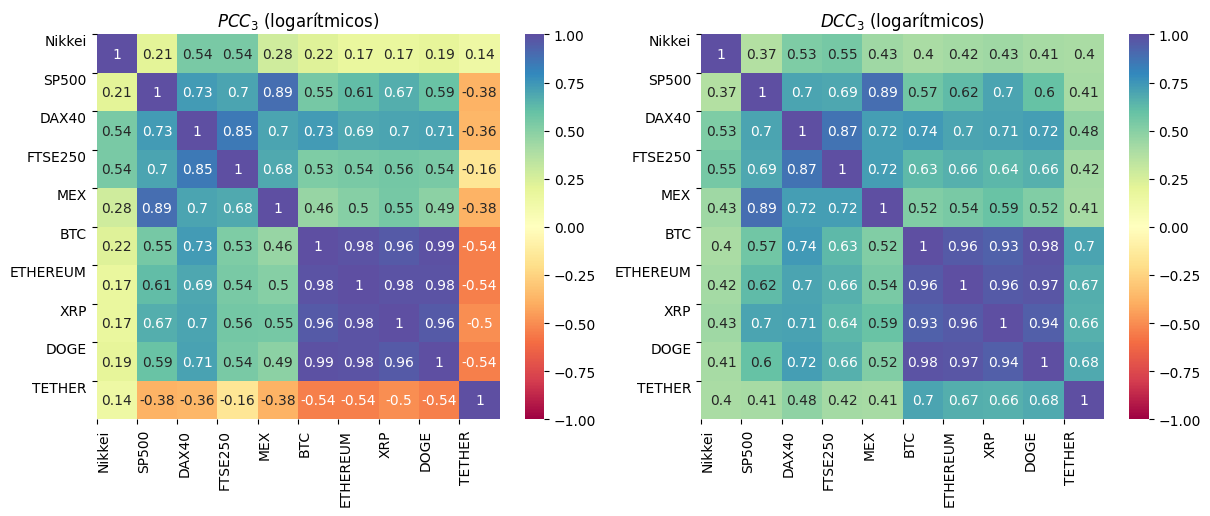

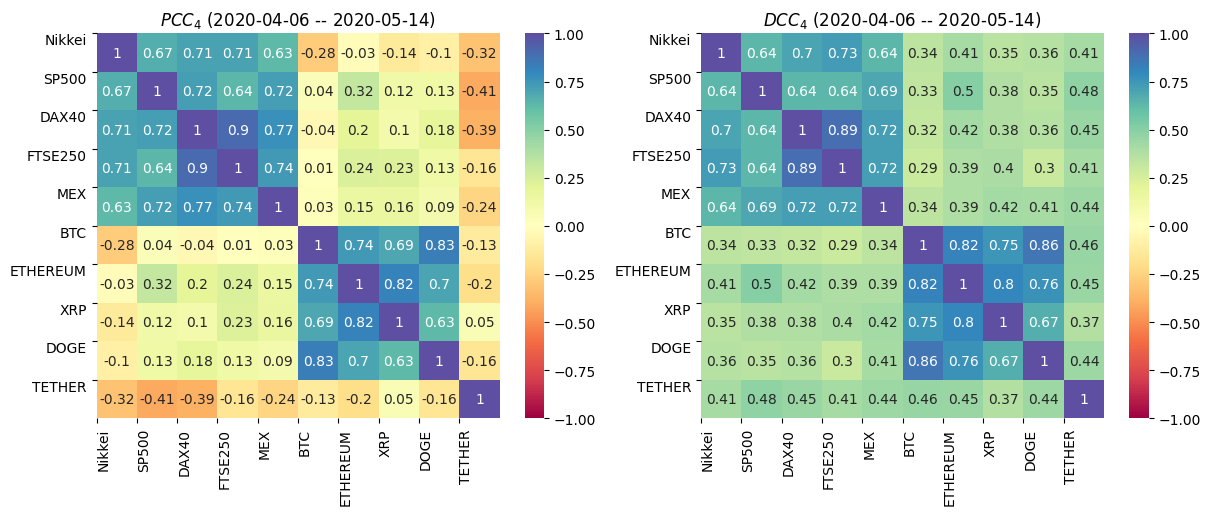

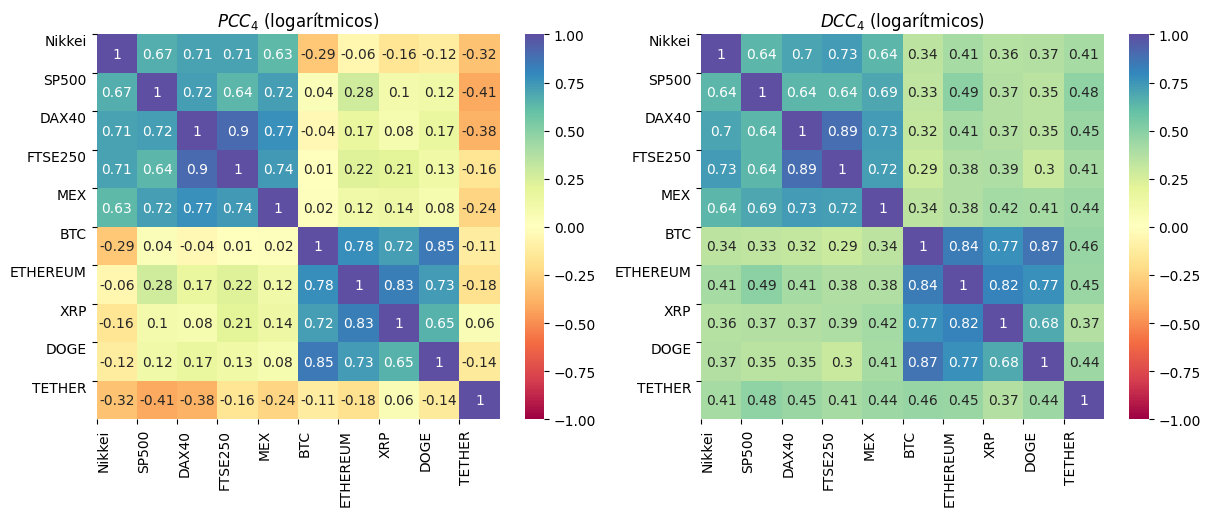

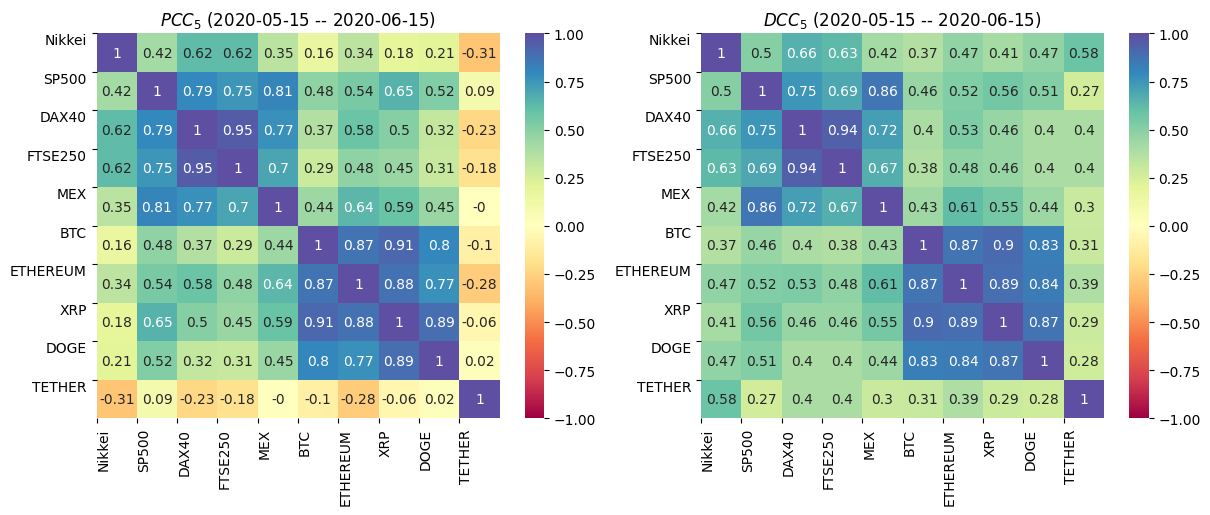

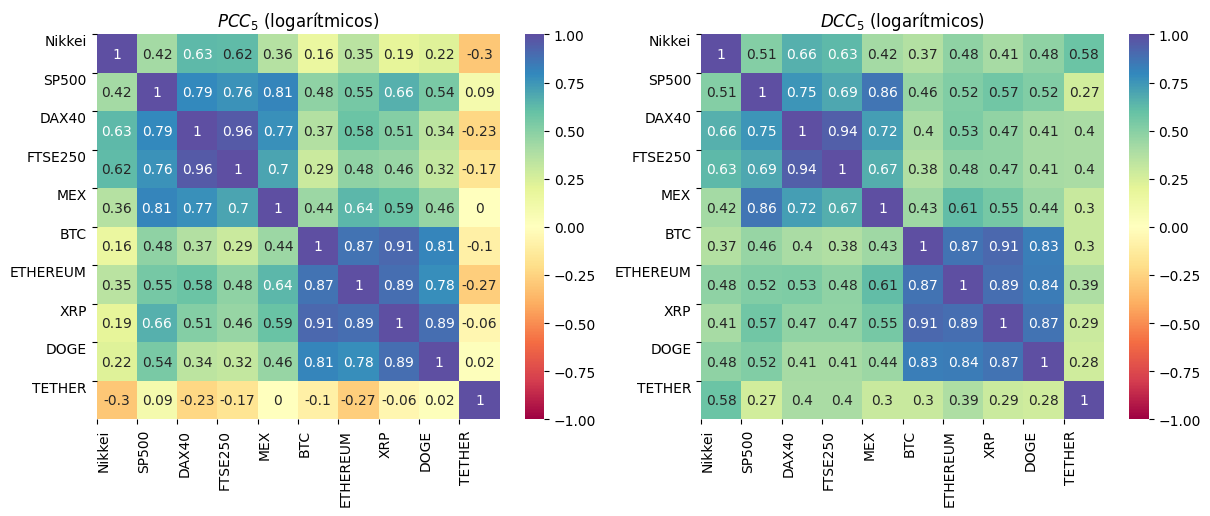

In [22]:
fecha_inicio = [I.columns[0].strftime('%Y-%m-%d') for I in Epocas]
fecha_fin = [I.columns[-1].strftime('%Y-%m-%d') for I in Epocas]
for inicio, fin, i in zip(fecha_inicio, fecha_fin, range(5)):
  #NORMALES
    corr_compplot(PCC_epocas[i], DCC_epocas[i], f"$PCC_{i+1}$ ({inicio} -- {fin})",
                f"$DCC_{i+1}$ ({inicio} -- {fin})")
  #LOGARITMICOS
    corr_compplot(PCC_epocas_log[i], DCC_epocas_log[i], f"$PCC_{i+1}$ (logarítmicos)",
                f"$DCC_{i+1}$ (logarítmicos)")

# CALCULAMOS EL PROMEDIO DE CORRELACIÓN PARA CADA ÉPOCA

In [23]:
mean_pcc = np.zeros(5)
mean_dcc = np.zeros(5)
mean_pcc_log = np.zeros(5)
mean_dcc_log = np.zeros(5)

for  i, pcc, dcc, pcc_log, dcc_log in zip(range(5), PCC_epocas, DCC_epocas, PCC_epocas_log, DCC_epocas_log):

  mean_pcc[i] = round(meanCC(pcc), 2)
  mean_dcc[i] = round(meanCC(dcc), 2)
  mean_pcc_log[i] = round(meanCC(pcc), 2)
  mean_dcc_log[i] = round(meanCC(dcc), 2)


<ipython-input-24-2a08c0f1a61f>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


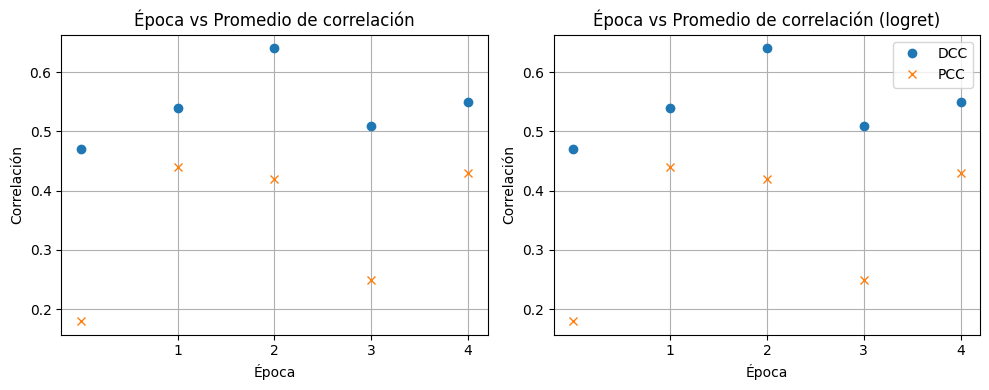

In [24]:
x = range(5)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title("Época vs Promedio de correlación")
axs[0].plot(x, mean_dcc, 'o', label = "DCC")
axs[0].plot(x, mean_pcc, 'x', label = "PCC")
axs[0].grid()
axs[0].set_xlabel("Época")
axs[0].set_ylabel("Correlación")
axs[0].set_xticks([1, 2, 3, 4])
plt.legend()

axs[1].set_title("Época vs Promedio de correlación (logret)")
axs[1].plot(x, mean_dcc_log, 'o', label = "DCC")
axs[1].plot(x, mean_pcc_log, 'x', label = "PCC")
axs[1].grid()
axs[1].set_xlabel("Época")
axs[1].set_ylabel("Correlación")
axs[1].set_xticks([1, 2, 3, 4])
plt.legend()
plt.tight_layout()
plt.show()

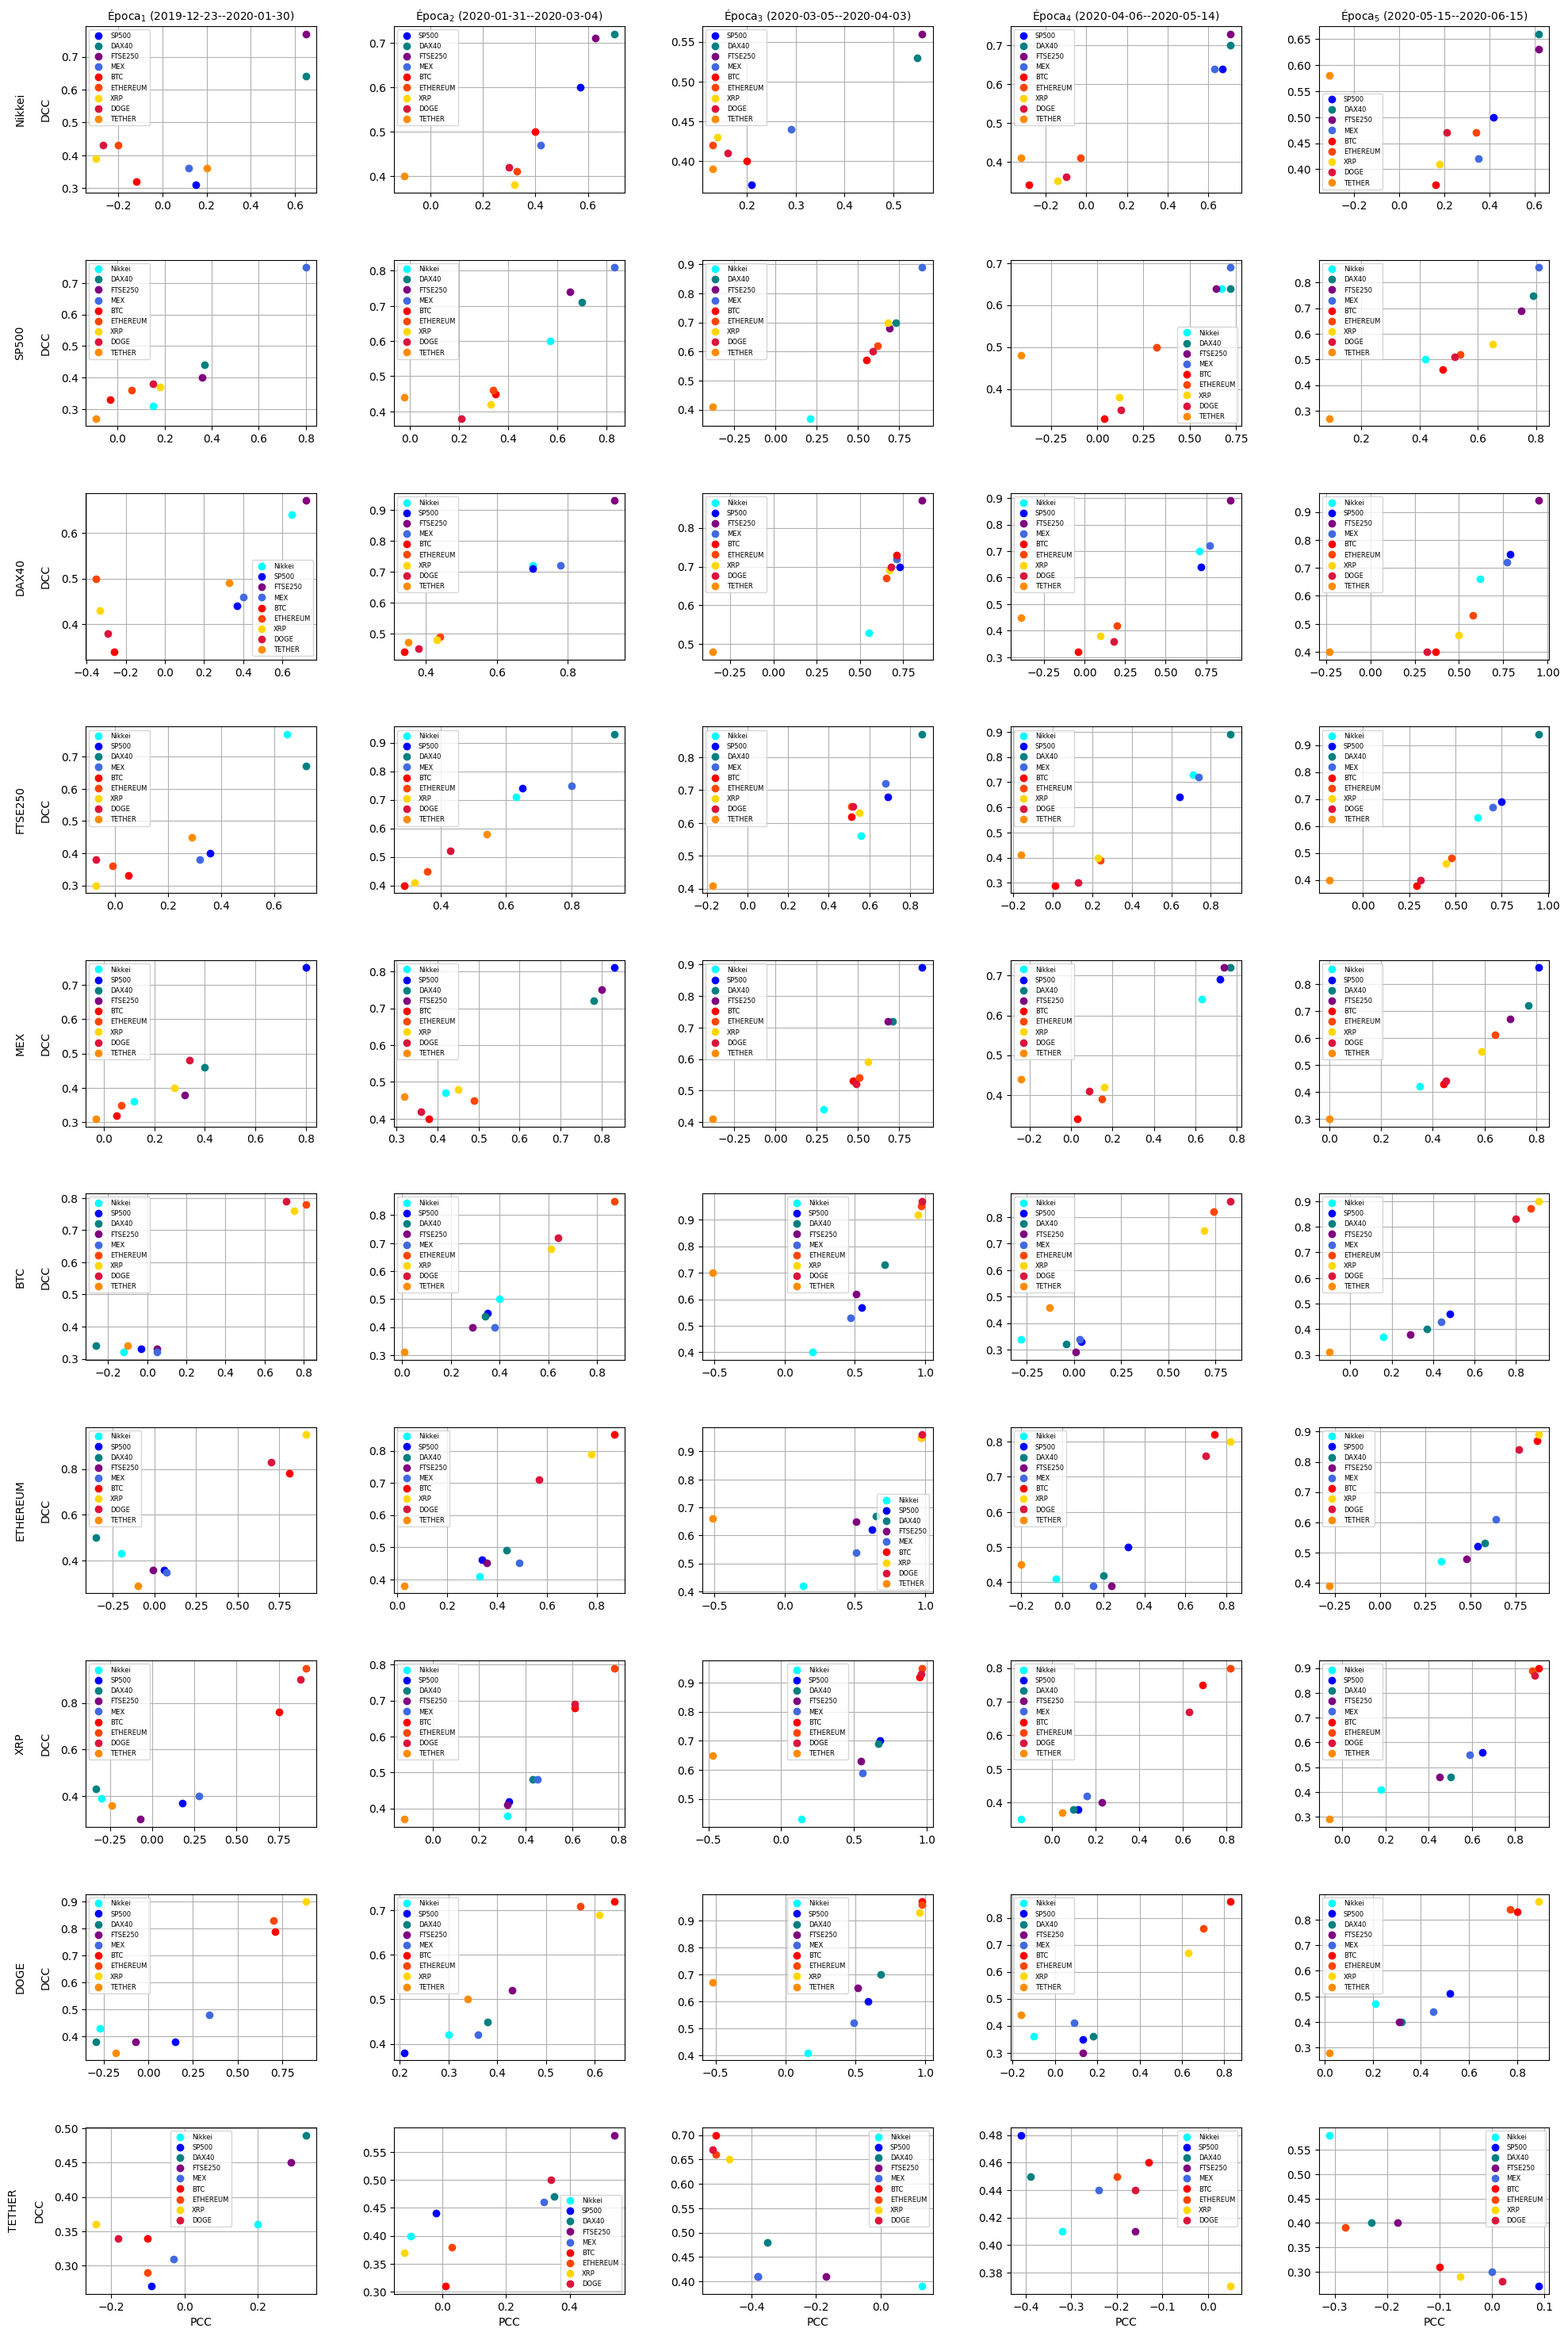

In [25]:

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 30))
fig.tight_layout(pad=4.0)

for col in range(5):  # Columnas (épocas)
    for j in range(10):  # Filas (índices de precios)
        ax = axes[j, col]
        indices = list(range(10))
        indices.remove(j)

        # Etiqueta de columna (arriba)
        if j == 0:
          ax.set_title(f'Época$_{col + 1}$ ({fecha_inicio[col]}--{fecha_fin[col]})', fontsize=10)

        # Etiqueta de fila (a la izquierda)
        if col == 0:
          ax.set_ylabel(f"{mt.Precios.index[j]}\n\nDCC", fontsize=10, rotation=90, labelpad=25, va='center')

        if j == 9:
          ax.set_xlabel("PCC", fontsize=10)
          #ax.set_ylabel("DCC", fontsize=8)

        for i in indices:
            ax.plot(PCC_epocas[col][j][i], DCC_epocas[col][j][i], 'o',
                    color=colores[i], label=mt.Precios.index[i])
        ax.grid(True)
        ax.legend(fontsize=6)

plt.show()